## Dataset Amazon customer product reviews

Based on the Amazon customer product review datasets which are available at: https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt 

This site contains a number of large review datasets made available by Amazon and broken down by product category. We will sample a number of these, taking into account the need to keep the sample representative of the larger datasets. This will be done by using the 'star_rating', 'vine' and 'verified_purchase' features to proportionally reduce the dataset for performance reasons. 

The dataset was chosen for its richness of features, the flexibility of classification that they will present and for the opportunity to run some sentiment analysis on the reviews. The main challenge will be in drawing meaningful conclusions from the reduced dataset.   

We'd be interested in investigating topics like the following:

- Are there anomalous patterns (perhaps indicating fake reviews) ?  
- Do sentiments change across product groups? Are people more likely to complain about certain product groups? Can we see a decline in customer satisfaction over time on certain products?
- Do people find certain types of reviews helpful? What is it about the review that might make it helpful?
- Do paid for reviews impact the review itself (feature 'vine' in the dataset) and is it possible to predict whether the review is by a Vine program member based on the review text?
- Impact of verified/non verified status on the review helpfulness and in turn how it affects the product sentiment 

## Summary 

The dataset chosen is Dataset "Amazon Customer Product Reviews".It will also allow to compare sentiment (as expressed in the text reviews) against the quantatitive scores which could give an insight into how people subjectively perceive, and and then objectively categorise, their experiences. 




### Random sampling

The original dataset has over three million rows of data which is challenging to handle. A subset of this is chosen using random smapling within the Pandas package. This subset should have a very similar distribution as the orginal provided that subset is large enough (Usually over 10000 rows). This will hoepfully reduce the computaional load whilst not drastically changing the result.

## Dataset Link

url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz'


In [1]:
!pip install torch
import torch
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required
!pip install transformers
from transformers import BertTokenizer, BertModel
from transformers import DistilBertModel, DistilBertTokenizer
import torch
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
# import numpy as np
import os
import tarfile
import urllib
# import pandas as pd
import urllib.request

# To plot pretty figures
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import datetime
from sklearn.impute import SimpleImputer
datetime.datetime.strptime
from sklearn.preprocessing import OneHotEncoder  
from sklearn.feature_extraction.text import CountVectorizer
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import sklearn.feature_selection.RFE as RFE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from transformers import BertTokenizer, BertModel
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

# Week 7 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy import unique
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Derek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Derek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Derek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df_original = pd.read_csv('datasets/AmazonMergedDataset.tsv', sep='\t', on_bad_lines='skip')
df_original["review_length"] = df_original["review_body"].map(str).apply(len)
df_original.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
0,US,50654080,R1JQCBMH0WFSF5,B00094OX2S,784696562,APC UPS Replacement Battery Cartridge for APC ...,Electronics,1.0,0.0,0.0,N,N,Don't Buy APC Brand Replacement Batteries!!!,The super expensive RBC32 batteries I've been ...,2014-10-12,4863
1,US,15678628,R2OKDFTKEGJB98,B00M6Q9W50,69036016,Buyit? Waterproof Wireless Bluetooth Shower Sp...,Electronics,2.0,0.0,0.0,N,Y,Disappointed. Not as loud as I'd like,Disappointed. Not as loud as I'd like. Didn't ...,2015-02-25,168
2,US,15010771,R1OCZPQU1UA590,B00DWD4LGG,86013178,Soundcast BlueCast - Bluetooth Wireless Transm...,Electronics,5.0,2.0,2.0,N,Y,Great addition to a great speaker system,"its awesome, works flawlessly, can now stream ...",2013-10-18,261
3,US,52975411,R1KTTUJNXW8FD,B00D5Q75RC,945049581,Bose SoundLink Mini Bluetooth Speaker,Electronics,5.0,0.0,0.0,N,Y,Five Stars,Awesome big sound out of a small package. Hig...,2014-08-31,60
4,US,10184046,R32T7VUEH1000O,B001TH7T2U,626749398,AmazonBasics HDMI to DVI Adapter Cable - 9.8 ...,Electronics,5.0,0.0,0.0,N,Y,HDMI to DVI,this is very comparable to the unit at Best Bu...,2013-04-05,127


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147795 entries, 0 to 147794
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        147795 non-null  object 
 1   customer_id        147795 non-null  int64  
 2   review_id          147795 non-null  object 
 3   product_id         147795 non-null  object 
 4   product_parent     147795 non-null  int64  
 5   product_title      147794 non-null  object 
 6   product_category   147795 non-null  object 
 7   star_rating        147795 non-null  float64
 8   helpful_votes      147795 non-null  float64
 9   total_votes        147795 non-null  float64
 10  vine               147795 non-null  object 
 11  verified_purchase  147795 non-null  object 
 12  review_headline    147793 non-null  object 
 13  review_body        147790 non-null  object 
 14  review_date        147795 non-null  object 
 15  review_length      147795 non-null  int64  
dtypes:

## Data Cleaning

### Removing coloumns not being used

The marketplace, product_category and review_id coloumns are not likely to be used in the analysis, so are removed to decrease the size of the dataset.

In [6]:
df_original = df_original.drop("marketplace", axis=1)  
df_original = df_original.drop("review_id", axis=1)
df_original.isna().sum()
df_original = df_original.dropna(subset=['review_body'])
df_original = df_original.dropna(subset=['review_headline'])
df_original = df_original.dropna(subset=['review_date'])
df_original = df_original.dropna(subset=['product_title'])
df_original["review_date"] = pd.to_datetime(df_original["review_date"]).dt.date
df_original["help_vs_total"] = df_original["helpful_votes"]/df_original["total_votes"]
df_original['product_parent'] = df_original['product_parent'].astype('int32')
df_original['help_vs_total'] = df_original['help_vs_total'].fillna(0)



## creating a histogram for the data

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'product_parent'}>,
        <AxesSubplot:title={'center':'star_rating'}>],
       [<AxesSubplot:title={'center':'helpful_votes'}>,
        <AxesSubplot:title={'center':'total_votes'}>,
        <AxesSubplot:title={'center':'review_length'}>],
       [<AxesSubplot:title={'center':'help_vs_total'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

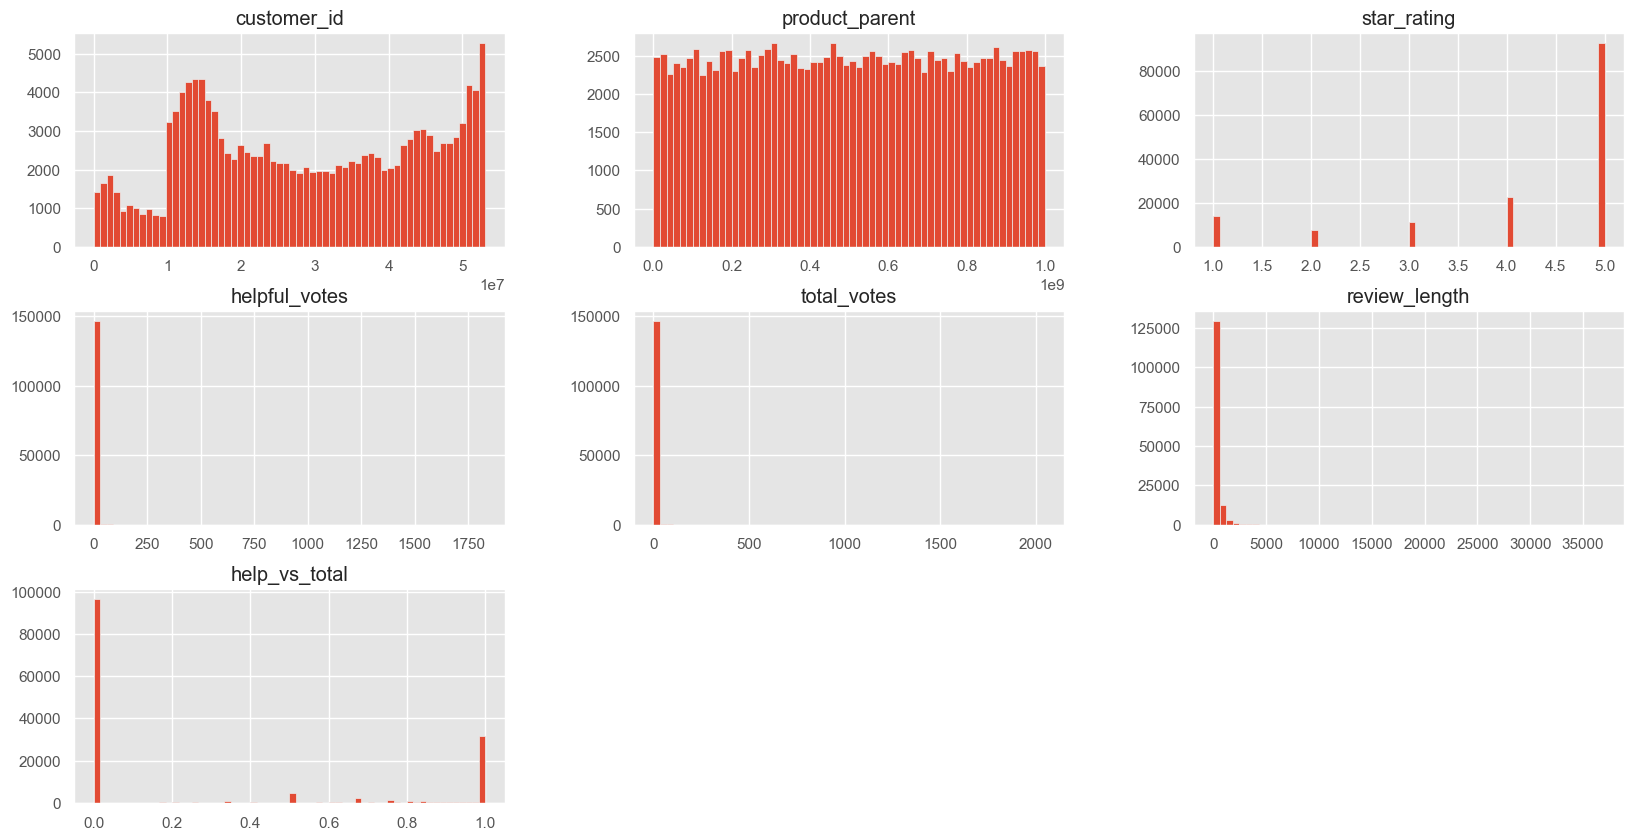

In [8]:
df_original.hist(bins=60, figsize=(20,10))

## Data Visualization

Random sampling to 10000 samples

In [9]:
df_original['sentiment'] = df_original['star_rating'].apply(lambda star_rating : +1 if star_rating > 3 else -1)
df_subset = df_original.sample(n=10000,  random_state=42)

df_subset = df_subset[(df_original['review_date']>datetime.date(2013,1,1)) & (df_original['review_date']<datetime.date(2015,12,31))]



### Creating a filter 

Using data from years 2013-2015(inclusive)  based on scatter plot

<AxesSubplot:xlabel='review_date', ylabel='star_rating'>

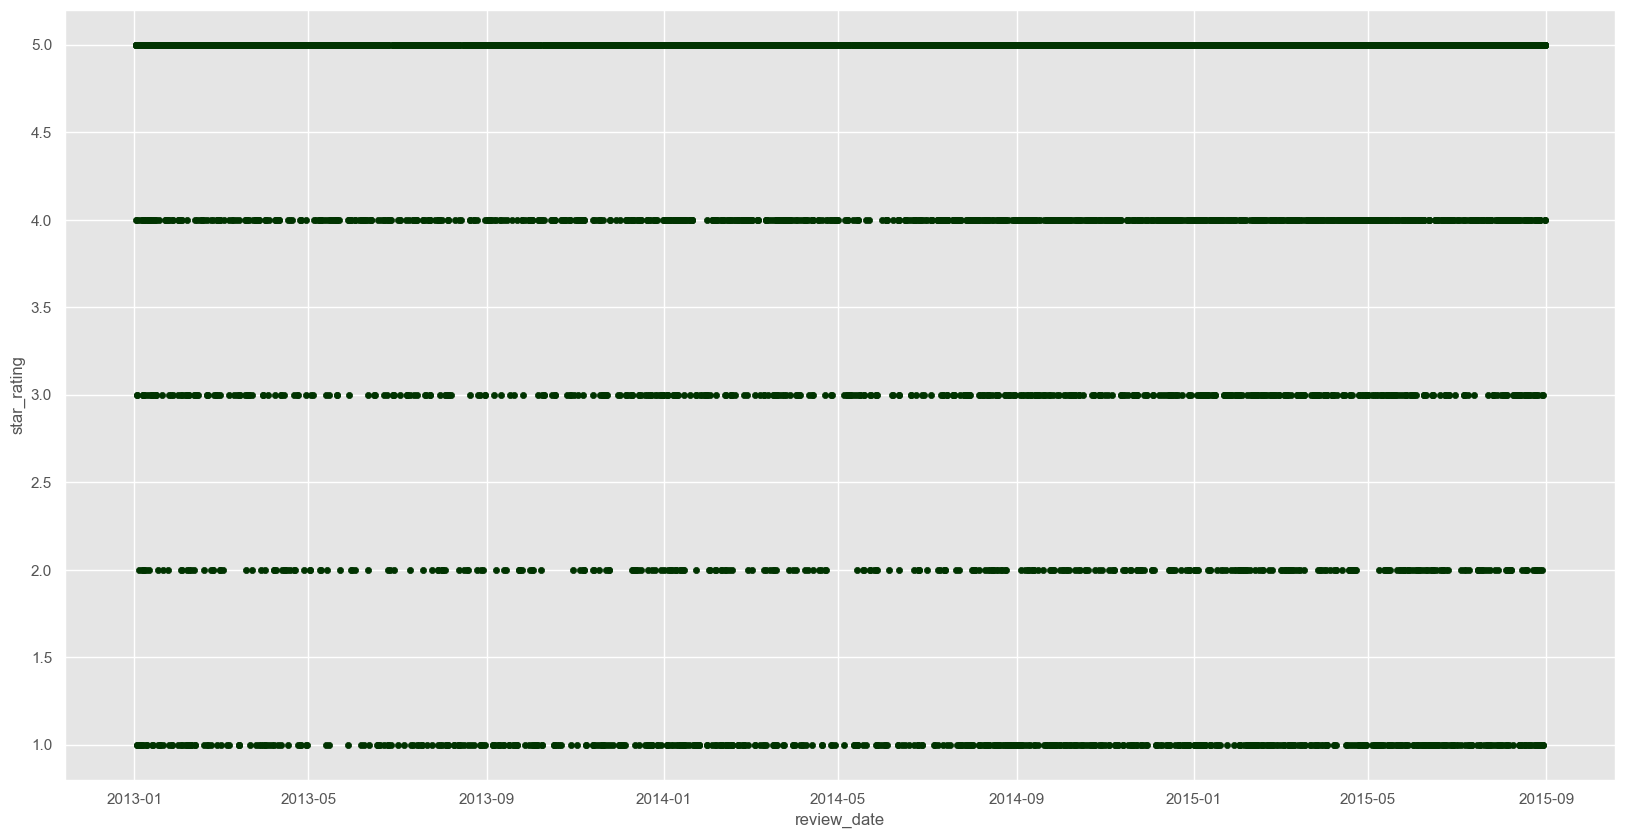

In [10]:
df_subset[['review_date','star_rating']].plot(kind='scatter', x='review_date', color=(0,0.2,0), y='star_rating', figsize=(20,10))

In [13]:
imputer = SimpleImputer(strategy="median") 
df_numeric = df_subset[["star_rating","total_votes","helpful_votes"]]
imputer.fit(df_numeric)

SimpleImputer(strategy='median')

### Ratings with the number of reviews

In [15]:
# review ratings grouped
review=pd.DataFrame(df_subset.groupby('star_rating').size().sort_values(ascending=False).rename('No of reviews').reset_index())
review.head()

,star_rating,No of reviews
0,5.0,4933
1,4.0,1033
2,1.0,663
3,3.0,541
4,2.0,371


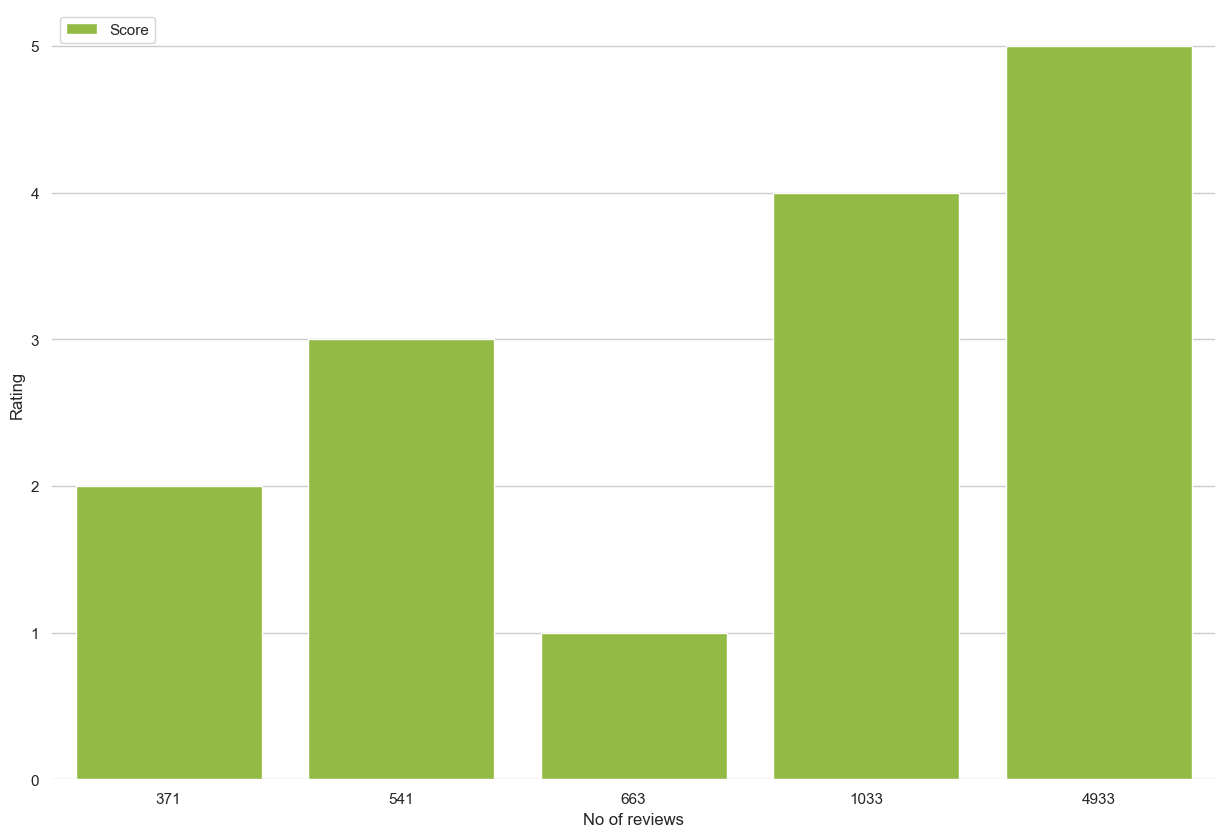

In [16]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10)) 
sns.set_color_codes("pastel") 
sns.barplot(y="star_rating", x="No of reviews", data=review.iloc[:20, :10],label="Score", color="yellowgreen")
ax.legend(ncol=2, loc="upper left", frameon=True) 
ax.set(xlabel="No of reviews",ylabel="Rating") 
sns.despine(left=True, bottom=True) 
plt.show()

Variance of Star ratings for different categories 

In [18]:
# Filter the data for relevant categories
vine_no = df_subset["star_rating"][df_subset['vine'] == "N"]
vine_yes = df_subset["star_rating"][df_subset['vine'] == "Y"]

verified_yes = df_subset["star_rating"][df_subset['verified_purchase'] == "Y"]
verified_no = df_subset["star_rating"][df_subset['verified_purchase'] == "N"]

long_review = df_subset["star_rating"][df_subset['review_length'] >= 20]
short_review = df_subset["star_rating"][df_subset['review_length'] < 20]
data = [df_subset["star_rating"], vine_yes, vine_no, verified_no , verified_yes, long_review, short_review ]



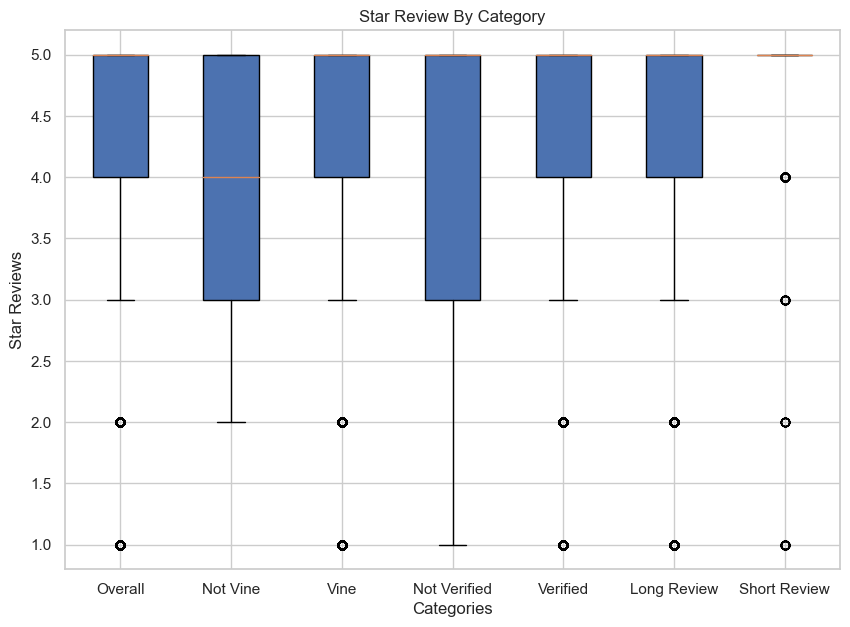

In [19]:
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data,patch_artist=True, labels=['Overall' , 'Not Vine', 'Vine', 'Not Verified', 'Verified', 'Long Review', 'Short Review']) 
plt.title('Star Review By Category')
plt.xlabel("Categories")
plt.ylabel("Star Reviews")


# show plot 
plt.show() 

### Ratings with their count of occurance and %

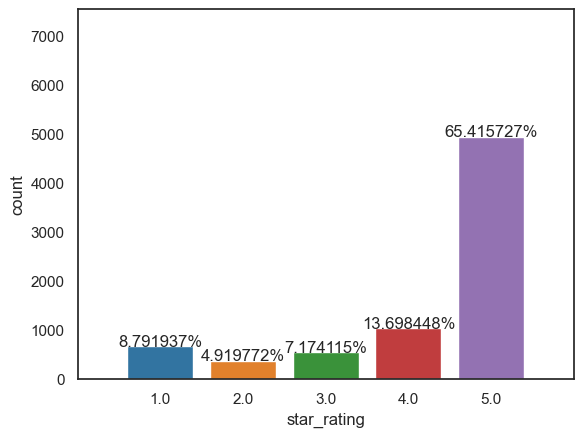

In [20]:
sns.set(style="white", palette="tab10", color_codes=True, )
ax = sns.countplot(data=df_subset,x='star_rating');
ax.set_ylim(0, len(df_subset))
ax.set_xlim(-1, 5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 9,
            '{:%}'.format(height/float(len(df_subset))),
            ha="center") 
plt.rcParams['figure.figsize']=(10,10)
plt.show();

### observation is that in the year 2015, 61% of users who left reviews have rated 5

###  Rating distribution with its density

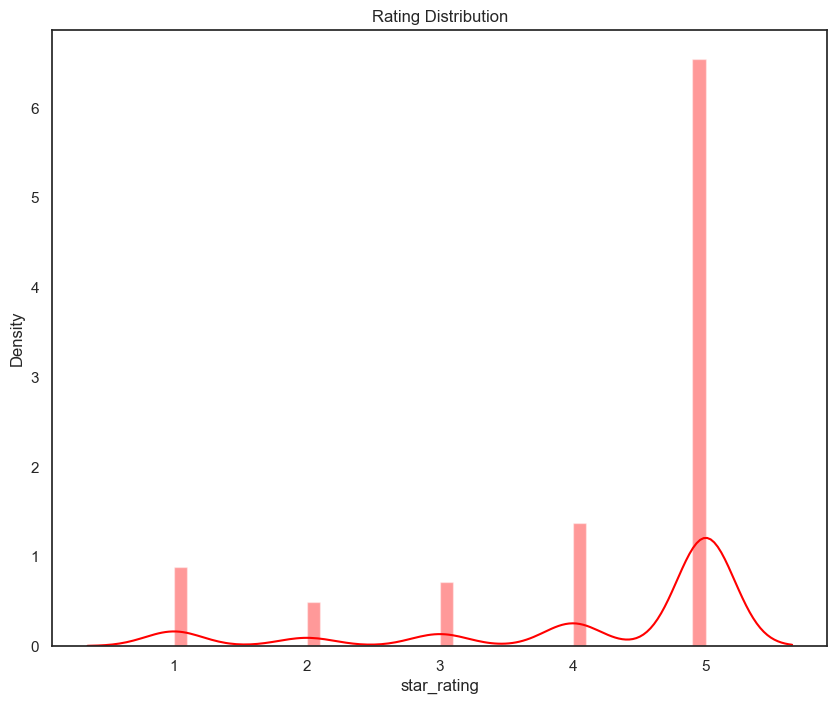

In [21]:
# Rating distribution with its density

x = df_subset['star_rating']
x=pd.to_numeric(x)

plt.figure(figsize=(10,8),)
plt.title('Rating Distribution')
sns.distplot(x,color='red');

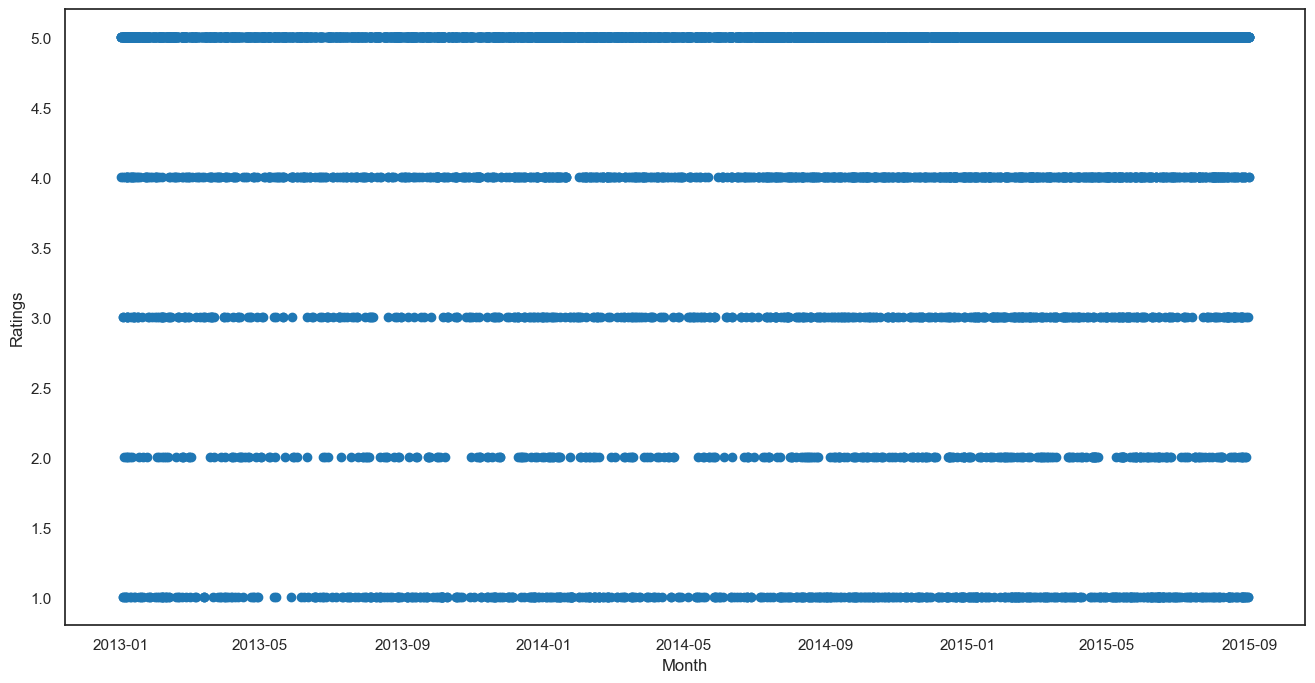

In [22]:
# Do a line chart
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_subset['review_date'], df_subset['star_rating'])
ax.set_xlabel('Month')
ax.set_ylabel('Ratings')
plt.show()

### Pie chart for distribution of different ratings

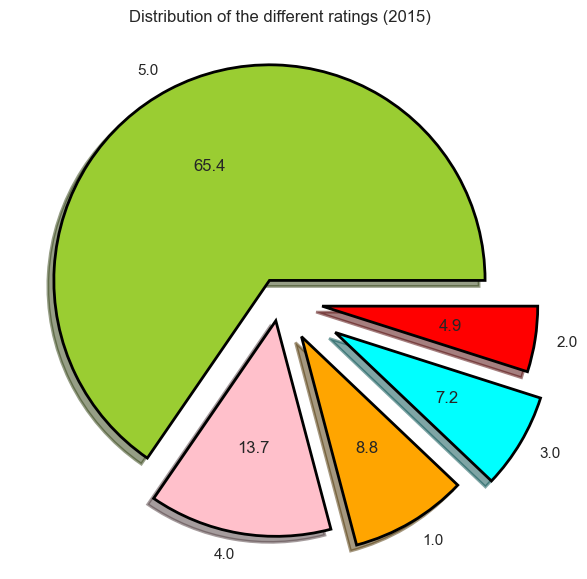

In [23]:
fig = plt.figure(figsize=(9,7))
colors = ("yellowgreen","pink","orange","cyan","red")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df_subset['star_rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings (2015)')
plt.show()

### Number of ratings and mean ratings recorded for each product

In [24]:
df_ratings=pd.DataFrame({'Number of Rating':df_subset.groupby('product_id').count()['star_rating'], 'Mean Rating':df_subset.groupby('product_id').mean()['star_rating']})

In [25]:
df_ratings['Number of Rating'].value_counts()

1    6441
2     377
3      57
5      13
4      11
6       3
8       2
9       2
7       2
Name: Number of Rating, dtype: int64

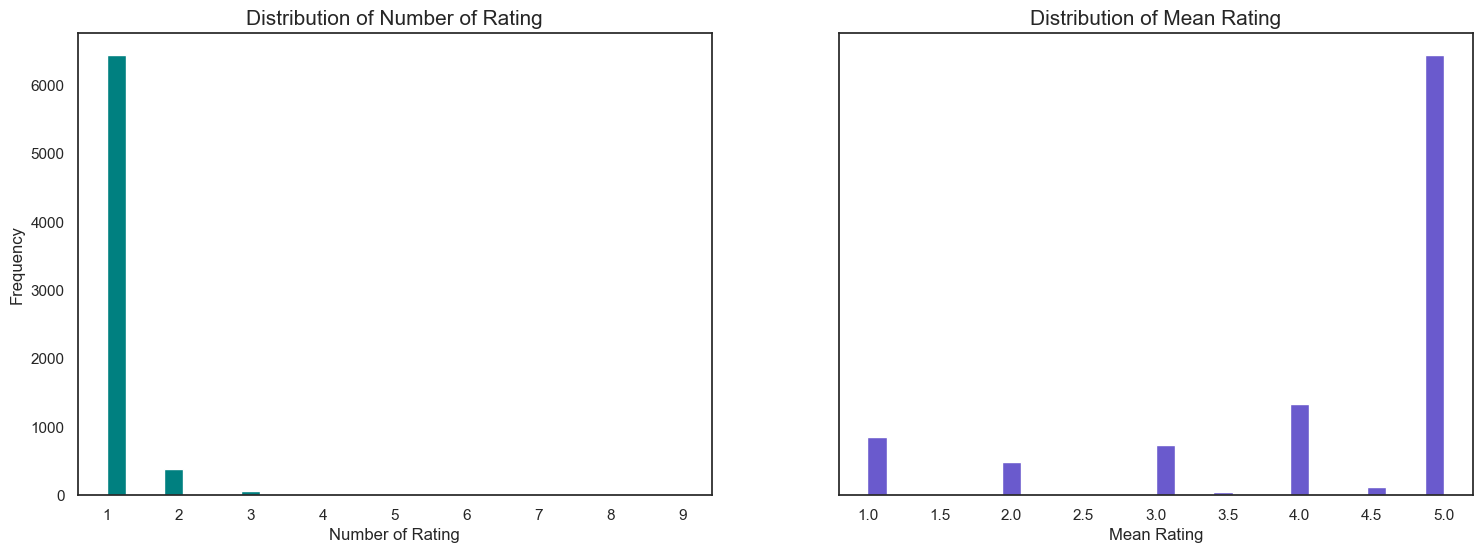

In [26]:
# Visualizing number of ratings and mean ratings recorded for each product in year 2015
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_ratings,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_ratings,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

### Visualizing a scatter plot to observe the relationship between Number of Rating and Mean Rating.

<Figure size 800x600 with 0 Axes>

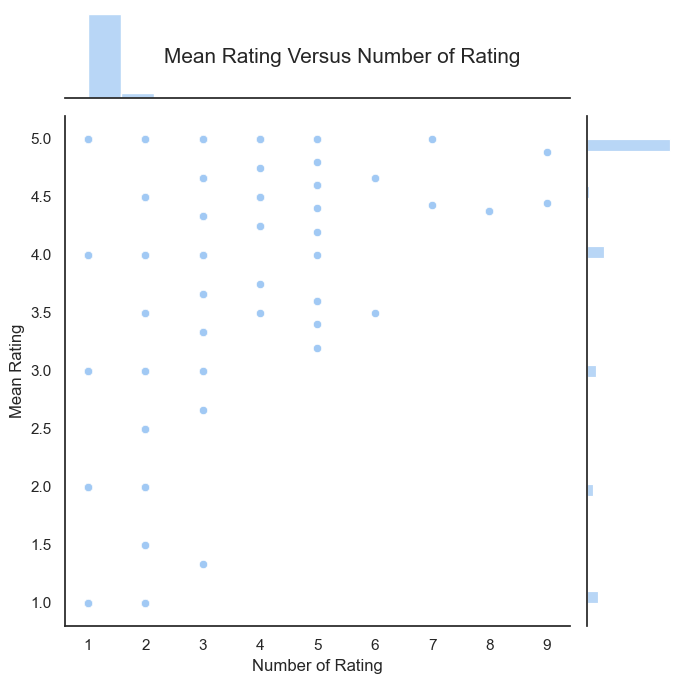

In [27]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_ratings,color='b', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

#### The mean rating for all the products is approximately 4.01 on a scale of 5

### Correlation 

In [33]:
pca_subset = df_subset.copy()
corr_matrix = df_subset.corr()
corr_matrix


,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,help_vs_total,sentiment
customer_id,1.000000,-0.016137,0.007086,0.001862,-0.000022,0.066898,0.036022,0.003091
product_parent,-0.016137,1.000000,-0.005671,-0.008323,-0.008234,-0.001894,0.019642,-0.004202
star_rating,0.007086,-0.005671,1.000000,-0.051572,-0.089523,-0.064645,-0.091355,0.914810
helpful_votes,0.001862,-0.008323,-0.051572,1.000000,0.980059,0.242899,0.260572,-0.042316
total_votes,-0.000022,-0.008234,-0.089523,0.980059,1.000000,0.246051,0.251130,-0.077083
review_length,0.066898,-0.001894,-0.064645,0.242899,0.246051,1.000000,0.213948,-0.057039
help_vs_total,0.036022,0.019642,-0.091355,0.260572,0.251130,0.213948,1.000000,-0.078805
sentiment,0.003091,-0.004202,0.914810,-0.042316,-0.077083,-0.057039,-0.078805,1.000000


In [34]:
corr_matrix["star_rating"].sort_values(ascending=False)

star_rating       1.000000
sentiment         0.914810
customer_id       0.007086
product_parent   -0.005671
helpful_votes    -0.051572
review_length    -0.064645
total_votes      -0.089523
help_vs_total    -0.091355
Name: star_rating, dtype: float64

### Plotting

(0.0, 16.0, 0.0, 550000.0)

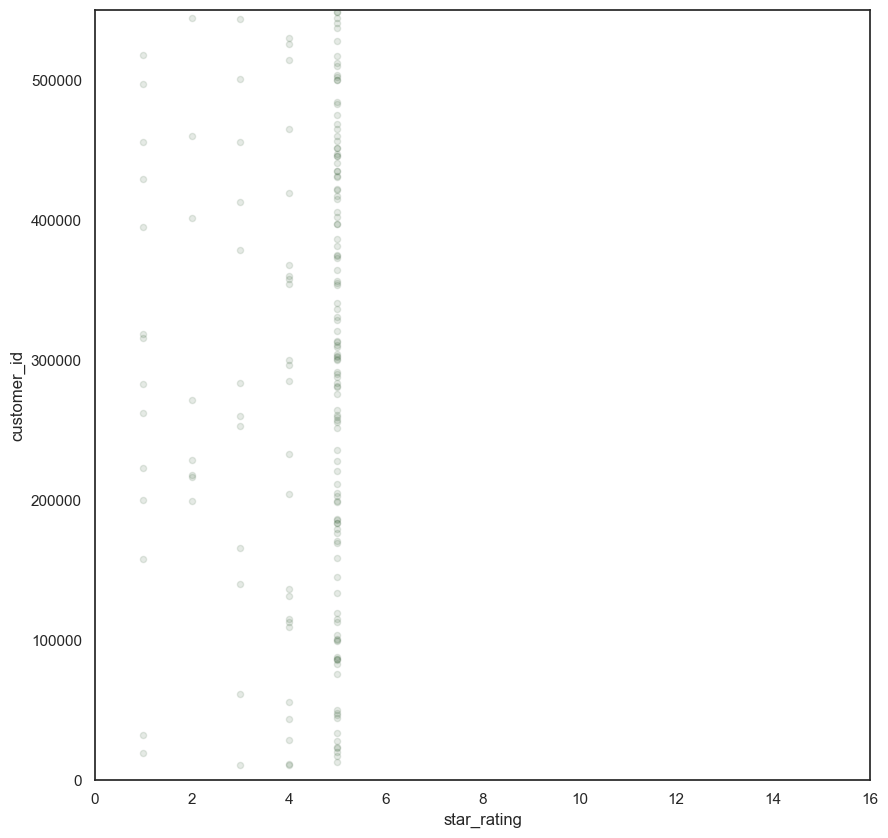

In [36]:
data_set_buffer.plot(kind="scatter", x="star_rating", y="customer_id",color=(0,0.2,0),
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

(0.0, 16.0, 0.0, 550000.0)

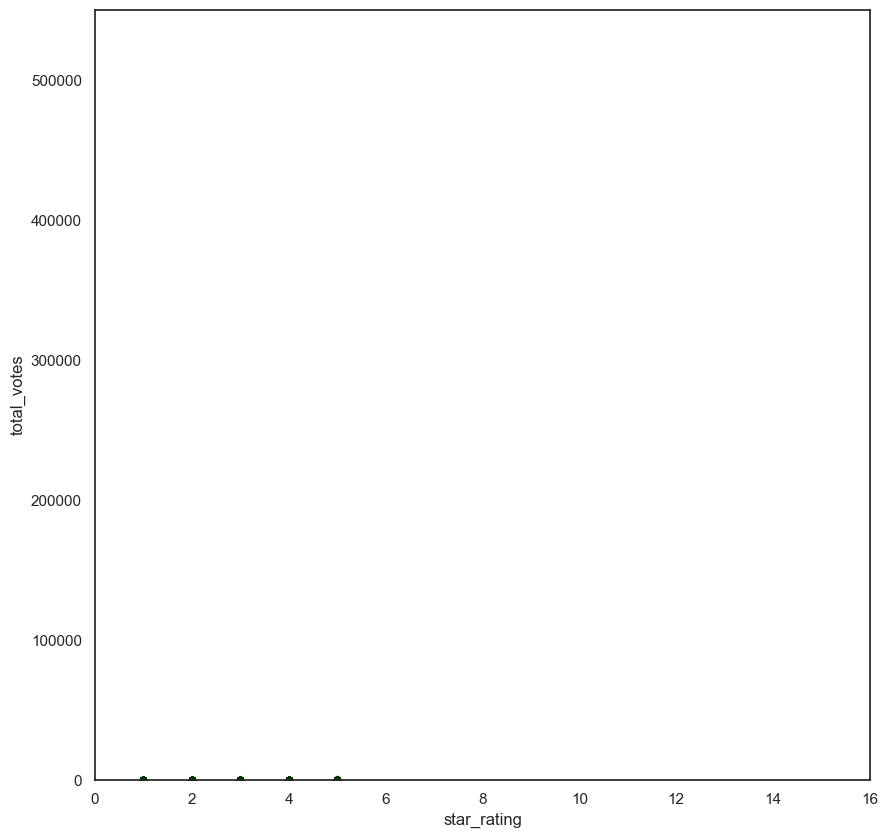

In [37]:
data_set_buffer.plot(kind="scatter", x="star_rating", y="total_votes", color=(0,0.2,0),
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

### Creating the most correlated attributes possible


In [38]:
df_original_cor = df_subset.copy()

df_original_cor["help_vs_total"] = df_subset["helpful_votes"]/df_subset["total_votes"]
df_original_cor["review_vs_total"] = df_subset["review_length"]/df_subset["total_votes"]

df_original_cor["help_vs_review"] = df_subset["helpful_votes"]/df_subset["review_length"]
df_original_cor["total_vs_review"] = df_subset["total_votes"]/df_subset["review_length"]

df_original_cor["total_vs_help"] = df_subset["total_votes"]/df_subset["helpful_votes"]
df_original_cor["review_vs_help"] = df_subset["review_length"]/df_subset["helpful_votes"]

df_original_cor['help_vs_total'] = df_original_cor['help_vs_total'].fillna(0)
df_original_cor['total_vs_help'] = df_original_cor['total_vs_help'].fillna(0)

corr_matrix = df_original_cor.corr(method='spearman', min_periods=1)
corr_matrix["star_rating"].sort_values(ascending=False)

star_rating        1.000000
sentiment          0.831871
review_vs_total    0.060073
review_vs_help     0.011900
customer_id        0.008089
product_parent    -0.006003
help_vs_total     -0.098242
help_vs_review    -0.119783
helpful_votes     -0.129570
review_length     -0.140886
total_vs_help     -0.170801
total_vs_review   -0.179359
total_votes       -0.197015
Name: star_rating, dtype: float64

In [39]:
corr_matrix["sentiment"].sort_values(ascending=False)

sentiment          1.000000
star_rating        0.831871
review_vs_total    0.085761
review_vs_help     0.040642
customer_id        0.003799
product_parent    -0.004152
help_vs_total     -0.104679
review_length     -0.129121
help_vs_review    -0.131878
helpful_votes     -0.139699
total_vs_help     -0.183930
total_vs_review   -0.189517
total_votes       -0.206073
Name: sentiment, dtype: float64

# Feature selection with correlation matrix

In [40]:
corr_matrix = df_subset.corr()
corr_matrix

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,help_vs_total,sentiment
customer_id,1.000000,-0.016137,0.007086,0.001862,-0.000022,0.066898,0.036022,0.003091
product_parent,-0.016137,1.000000,-0.005671,-0.008323,-0.008234,-0.001894,0.019642,-0.004202
star_rating,0.007086,-0.005671,1.000000,-0.051572,-0.089523,-0.064645,-0.091355,0.914810
helpful_votes,0.001862,-0.008323,-0.051572,1.000000,0.980059,0.242899,0.260572,-0.042316
total_votes,-0.000022,-0.008234,-0.089523,0.980059,1.000000,0.246051,0.251130,-0.077083
review_length,0.066898,-0.001894,-0.064645,0.242899,0.246051,1.000000,0.213948,-0.057039
help_vs_total,0.036022,0.019642,-0.091355,0.260572,0.251130,0.213948,1.000000,-0.078805
sentiment,0.003091,-0.004202,0.914810,-0.042316,-0.077083,-0.057039,-0.078805,1.000000


In [41]:
corr_matrix["star_rating"].sort_values(ascending=False)

star_rating       1.000000
sentiment         0.914810
customer_id       0.007086
product_parent   -0.005671
helpful_votes    -0.051572
review_length    -0.064645
total_votes      -0.089523
help_vs_total    -0.091355
Name: star_rating, dtype: float64

<AxesSubplot:>

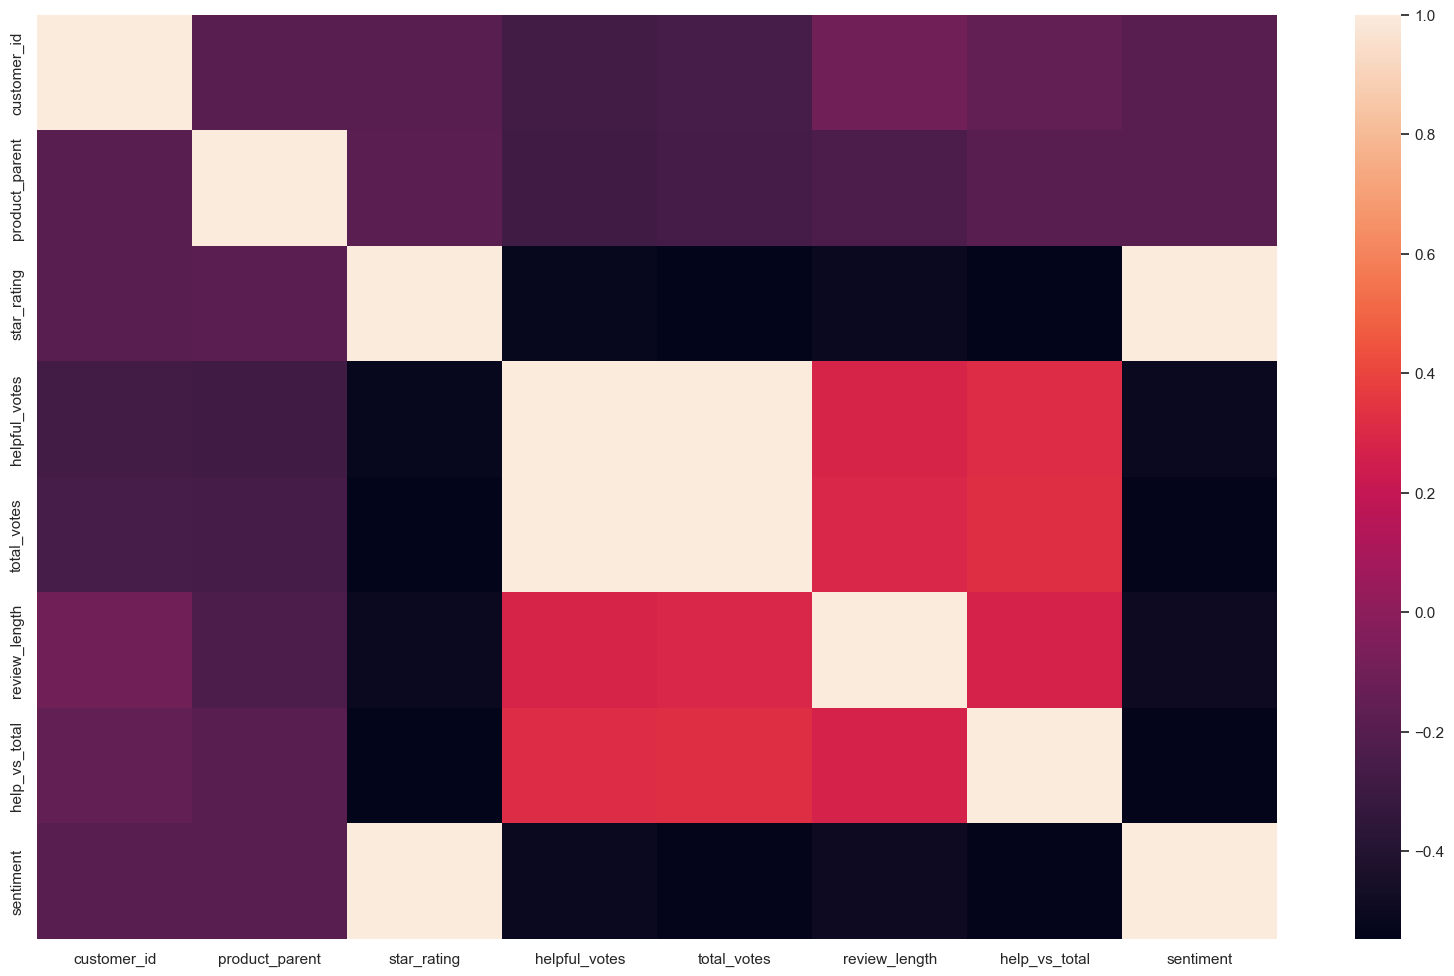

In [42]:
plt.figure(figsize = (20,12))
sns.heatmap(corr_matrix.corr())

## Preparing the text for sentiment analyses

In [43]:
# Function to perform lowercase conversion,then we removed punctuations,then we performed tokeniozation
# and removed stop words.

def data_processing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# Applying data_processing function on the review_body


# Used a stemmer to root/base words in the review_body column
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

# Applying stemming to the processed data in review_body
df_subset['review_body'] = df_subset['review_body'].apply(lambda x: stemming(x))

##  Testing performance of PCA

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()
pca_subset_MinMax = min_max_scaler.fit_transform(pca_subset[['star_rating', 'review_length', 'help_vs_total']])

In [46]:
pca = PCA(n_components = 2)
subset_rating_formatted_2D = pca.fit_transform(pca_subset_MinMax)

### Change in variance after reducing dimensions

In [47]:
1-pca.explained_variance_ratio_.sum()

0.004592151036695302

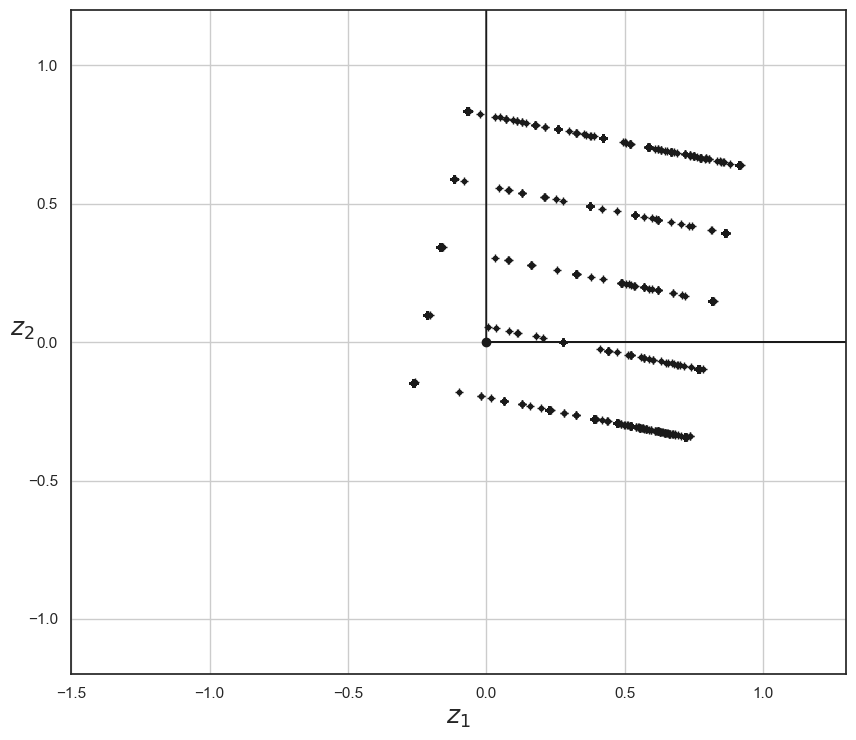

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(subset_rating_formatted_2D[:, 0], subset_rating_formatted_2D[:, 1], "k+")
ax.plot(subset_rating_formatted_2D[:, 0], subset_rating_formatted_2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 5, head_width=0.5, length_includes_head=True, head_length=0.5, fc='k', ec='k')
ax.arrow(0, 0, 5, 0, head_width=0.5, length_includes_head=True, head_length=0.5, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)


### PCA is not suitable for our dataset as features lack corelation, as well as some of the features are categorical in nature, wheras PCA works best for numerical data

## Text Analysis

In [50]:
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    return  scores 


df_text_subset = df_subset.copy()
#vader_sentiment_result
df_text_subset["vader_headline"] = df_text_subset["review_headline"].apply(lambda x: vader_sentiment_result(x))
df_text_subset = pd.concat([df_text_subset.drop(['vader_headline'], axis=1), df_text_subset['vader_headline'].apply(pd.Series)], axis=1)

df_text_subset.rename(columns = {'neg':'neg_h', 'neu':'neu_h', 'pos':'pos_h', 'compound':'compound_h'}, inplace = True)
df_text_subset["vader_body"] = df_text_subset["review_body"].apply(lambda x: vader_sentiment_result(x))

df_text_subset = pd.concat([df_text_subset.drop(['vader_body'], axis=1), df_text_subset['vader_body'].apply(pd.Series)], axis=1)
df_text_subset.rename(columns = {'neg':'neg_b', 'neu':'neu_b', 'pos':'pos_b', 'compound':'compound_b'}, inplace = True)

#df_subset.drop(["star_rating", "review_headline", "review_body"], axis = 1,  inplace = True )

# Move sentiment to end of column 
df_text_subset = pd.concat([df_text_subset, df_text_subset.pop('sentiment')], 1)
#print(new_df)
#df_subset.head()
corr_matrix = df_text_subset.corr()
#corr_matrix
print(corr_matrix["sentiment"].sort_values(ascending=False))

sentiment         1.000000
star_rating       0.914810
compound_b        0.479411
compound_h        0.391777
pos_b             0.354844
pos_h             0.292532
customer_id       0.003091
product_parent   -0.004202
helpful_votes    -0.042316
review_length    -0.057039
total_votes      -0.077083
help_vs_total    -0.078805
neu_h            -0.122688
neu_b            -0.237122
neg_b            -0.366678
neg_h            -0.381242
Name: sentiment, dtype: float64


In [51]:
df_text_subset.columns

Index(['customer_id', 'product_id', 'product_parent', 'product_title',
       'product_category', 'star_rating', 'helpful_votes', 'total_votes',
       'vine', 'verified_purchase', 'review_headline', 'review_body',
       'review_date', 'review_length', 'help_vs_total', 'neg_h', 'neu_h',
       'pos_h', 'compound_h', 'neg_b', 'neu_b', 'pos_b', 'compound_b',
       'sentiment'],
      dtype='object')

In [52]:
label = LabelEncoder()

# Target values
#XX = df_subset.iloc[:, 1:8 ]
XX = df_text_subset[['neg_h', 'neu_h', 'pos_h', 'compound_h', 'neg_b', 'neu_b', 'pos_b', 'compound_b']]

YY = df_text_subset.iloc[:, -1 ]
XX = XX.apply(label.fit_transform)



# Split into Train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(XX, YY,test_size=0.2,random_state=0)

#Classifier to check accuracy before features were removed
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)


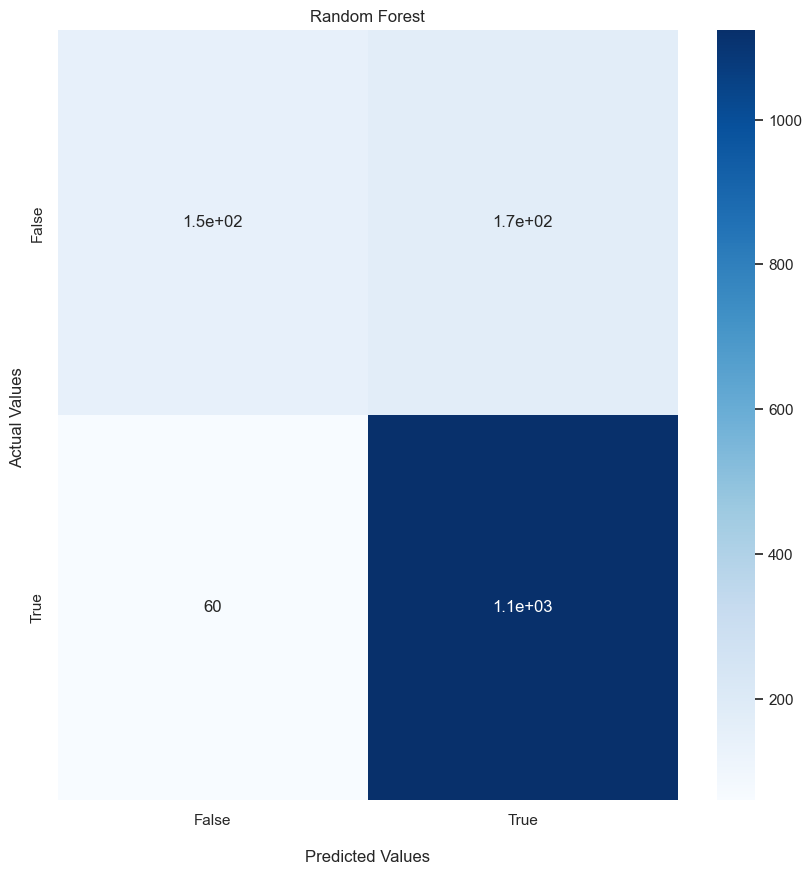

              precision    recall  f1-score   support

          -1       0.72      0.46      0.56       325
           1       0.87      0.95      0.91      1184

    accuracy                           0.84      1509
   macro avg       0.79      0.71      0.73      1509
weighted avg       0.83      0.84      0.83      1509



In [54]:
confusion_matrix1 = confusion_matrix(Y_test, y_pred)

my_matrix = sns.heatmap(confusion_matrix1, annot=True, cmap='Blues')
my_matrix.set_title('Random Forest');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(Y_test, y_pred))

In [55]:
y_pred_cross_val = cross_val_predict(clf, XX, YY, cv=10)
conf_mat = confusion_matrix(YY, y_pred_cross_val)

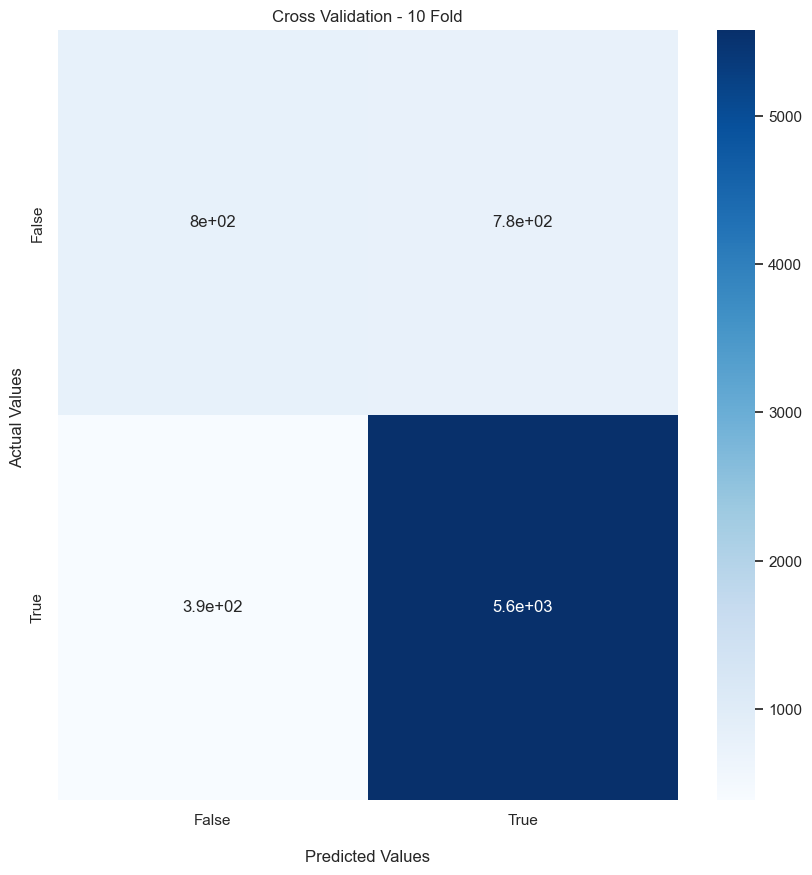

In [56]:
my_matrix = sns.heatmap(conf_mat, annot=True, cmap='Blues')
my_matrix.set_title('Cross Validation - 10 Fold');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



## K Means - Elbow method to get best value for clusters

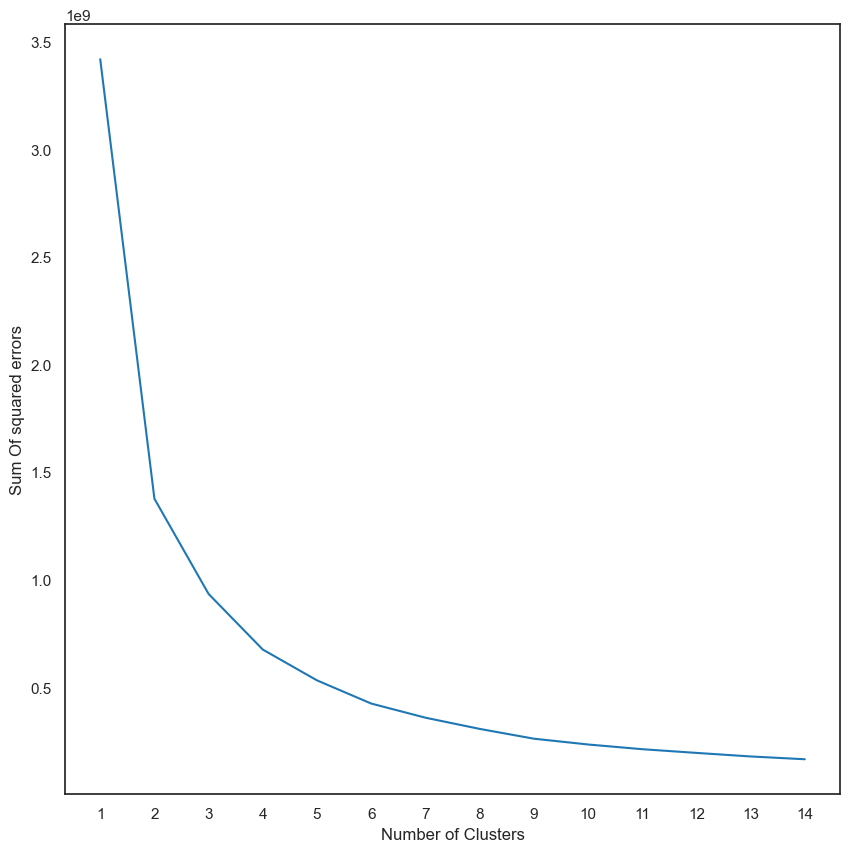

In [58]:
kmeans_kwargs = { "init": "random",  "n_init": 15, "random_state": 1, }

#create list to hold SSE values for each k
display = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_2_result)
    display.append(kmeans.inertia_)
   
    
#visualize results
plt.plot(range(1, 15), display)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Of squared errors")
plt.show()

## Show distribution of data that needs to be clustered

In [59]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

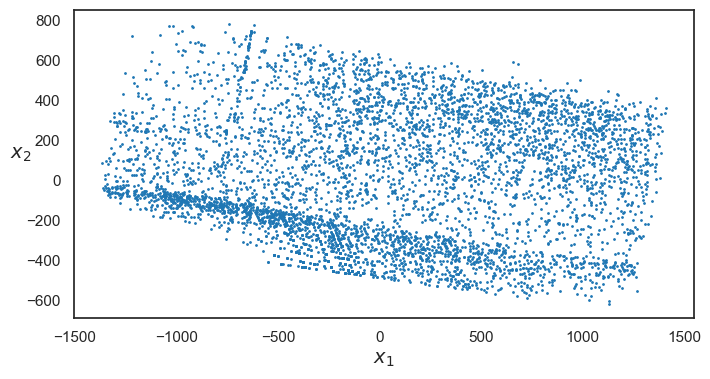

In [60]:
plt.figure(figsize=(8, 4))
plot_clusters(pca_2_result)
plt.show()

In [61]:
# Fit based on cluster number from Elbow graph
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(pca_2_result)
kmeans_test = kmeans.predict(pca_2_test_result)



## Decision Boundaries of the encoded data

In [62]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Training Set


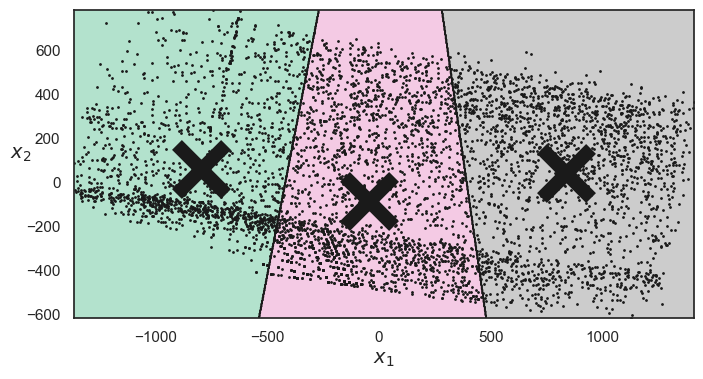

Test Set


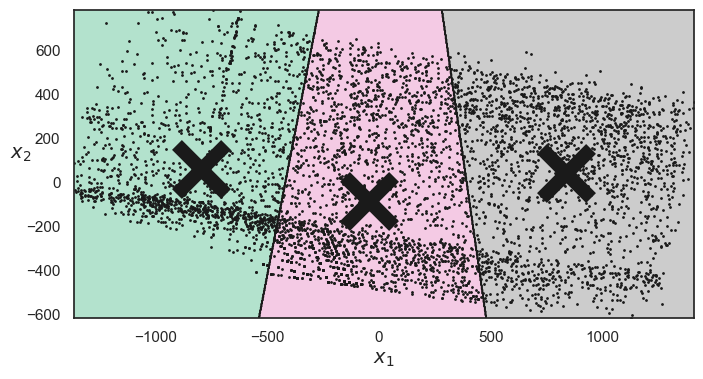

In [63]:
print("Training Set")
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, pca_2_result)
plt.show()

print("Test Set")
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, pca_2_result)
plt.show()


In [76]:
# Showing Variation caused by iterations
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=10, random_state=1)
kmeans_iter1.fit(pca_2_result)
kmeans_iter2.fit(pca_2_result)
kmeans_iter3.fit(pca_2_result)

KMeans(algorithm='full', init='random', max_iter=10, n_clusters=5, n_init=1,
       random_state=1)

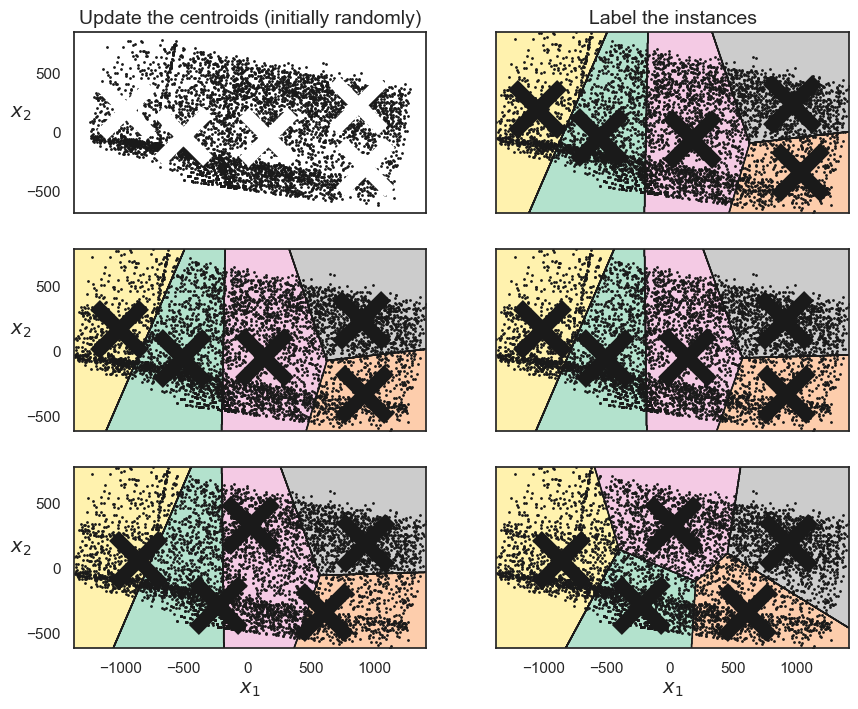

In [77]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(pca_2_result)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, pca_2_result, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, pca_2_result, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, pca_2_result, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, pca_2_result, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, pca_2_result, show_ylabels=False)

plt.show()

# Manual cluster change

In [66]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter1.fit(pca_2_result)
kmeans_iter2.fit(pca_2_result)
kmeans_iter3.fit(pca_2_result)

KMeans(algorithm='full', init='random', max_iter=1, n_clusters=5, n_init=1,
       random_state=1)

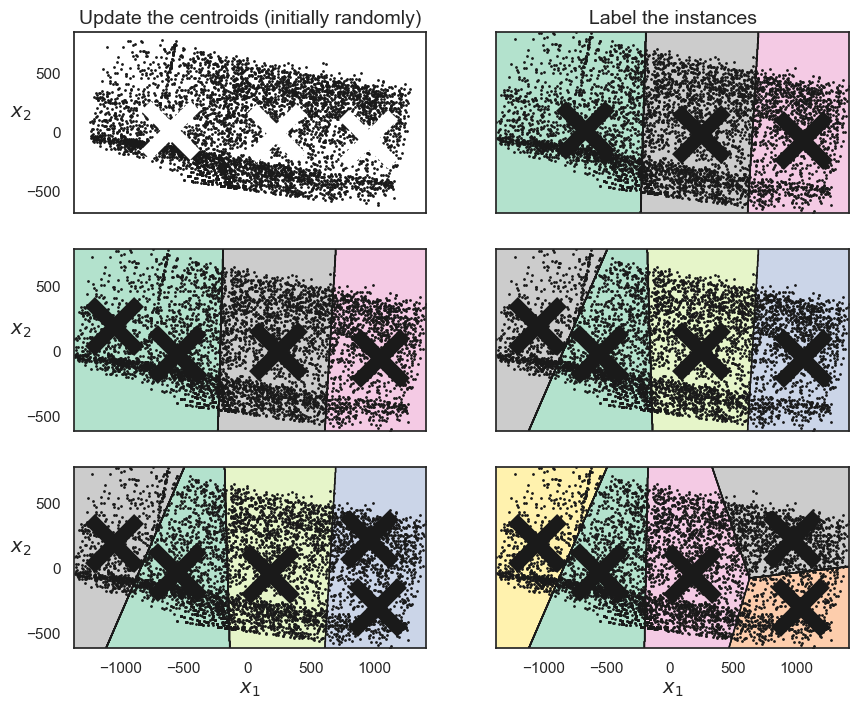

In [67]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(pca_2_result)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, pca_2_result, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, pca_2_result, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, pca_2_result, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, pca_2_result, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, pca_2_result, show_ylabels=False)

plt.show()

## Cluster Comparison

In [68]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

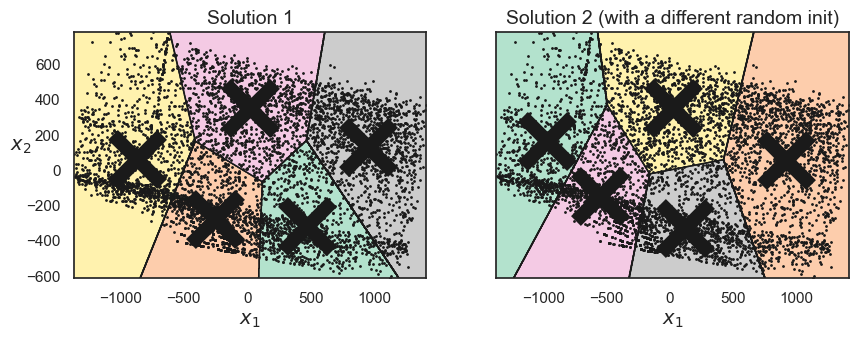

In [69]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, pca_2_result,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

In [70]:
# Cluster changes

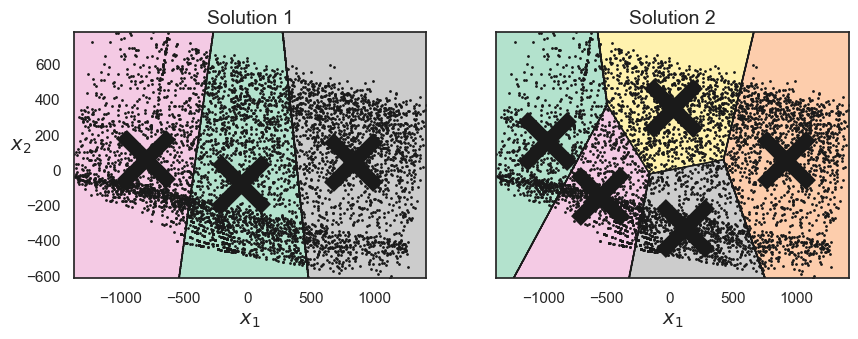

In [71]:
kmeans_rnd_init1 = KMeans(n_clusters=3, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, pca_2_result,
                          "Solution 1", "Solution 2")
plt.show()

In [72]:
print("3 cluster Inertia: ", kmeans_rnd_init1.inertia_)
print("5 cluster Inertia: ", kmeans_rnd_init2.inertia_)

3 cluster Inertia:  933663942.2031969
5 cluster Inertia:  589461870.2605003


## Plot Hierarchical V K Means V Gaussian

Gaussian - Error Minimisation


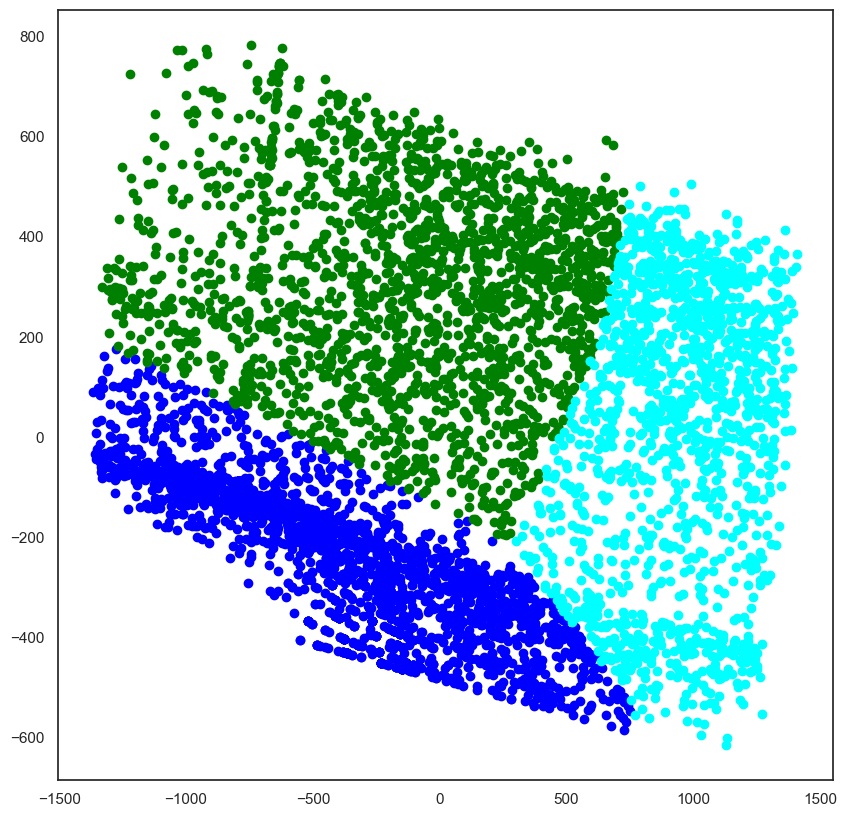

K Means


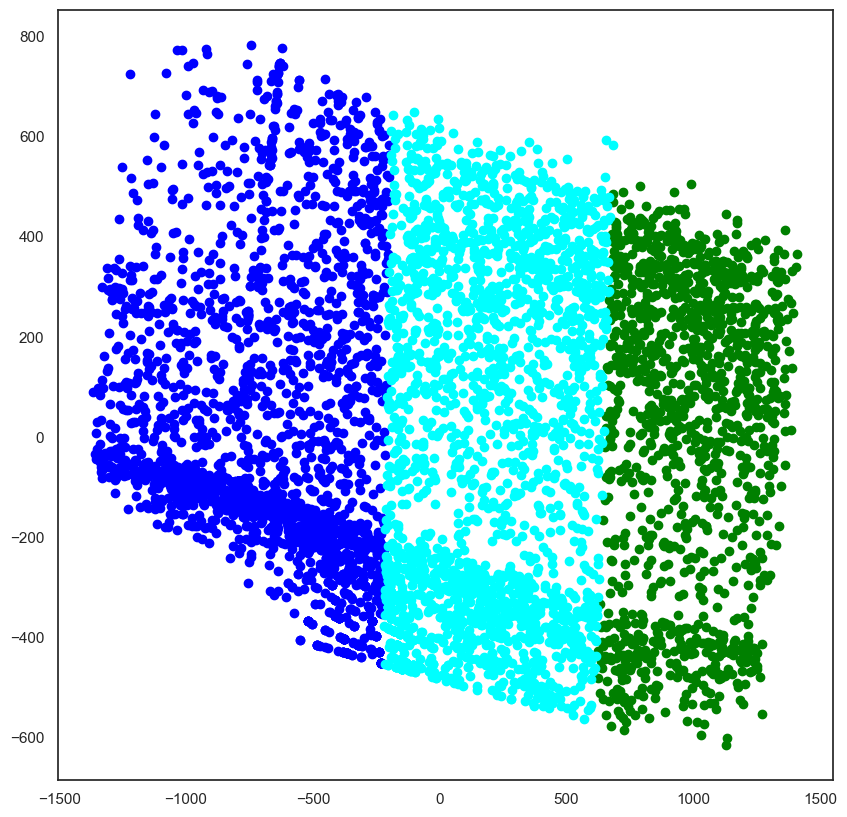

AgglomerativeClustering


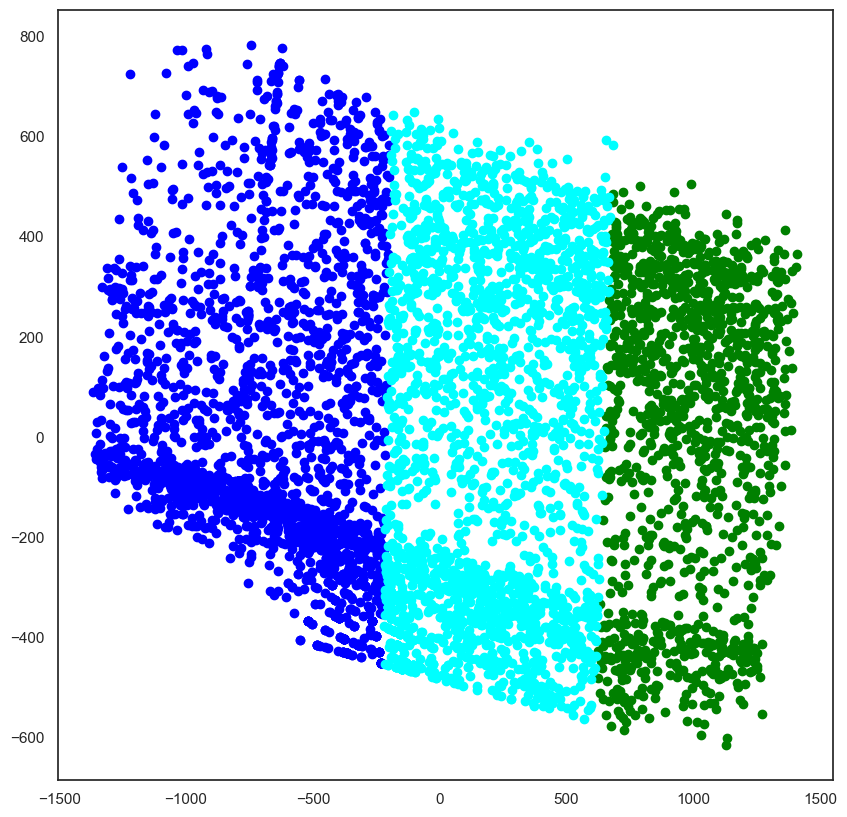

In [74]:
# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(pca_2_result)

print("Gaussian - Error Minimisation")
#predictions from gmm
labels = gmm.predict(pca_2_result)
frame = pd.DataFrame(pca_2_result)
frame['cluster'] = labels
frame.columns = ['One', 'Two', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["One"],data["Two"],c=color[k])
plt.show()

#Plot k means 3 cluster model on same chart
print("K Means")
labels = kmeans_iter1.predict(pca_2_result)
frame = pd.DataFrame(pca_2_result)
frame['cluster'] = labels
frame.columns = ['One', 'Two', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["One"],data["Two"],c=color[k])
plt.show()

print("AgglomerativeClustering")
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(pca_2_result)
labels = kmeans_iter1.predict(pca_2_result)
frame = pd.DataFrame(pca_2_result)
frame['cluster'] = labels
frame.columns = ['One', 'Two', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["One"],data["Two"],c=color[k])
plt.show()


## Scoring

In [75]:
print(" K-Means Scoring")
print("  ")
# Check scoring of K means versus GMM model
# from https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
# fit the model
kmeans_iter1.fit(pca_2_result)
# assign a cluster to each example
yhat = kmeans_iter1.predict(pca_2_result)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(pca_2_result, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(pca_2_result, yhat)
score_dbsacn_d = davies_bouldin_score(pca_2_result, yhat)
print("Silhouette Score: %.4f" % score_dbsacn_s)

print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)


# fit the model
print("  ")
print(" GMM Scoring")
print("  ")
gmm.fit(pca_2_result)
# assign a cluster to each example
yhat = gmm.predict(pca_2_result)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(pca_2_result, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(pca_2_result, yhat)
score_dbsacn_d = davies_bouldin_score(pca_2_result, yhat)
print("Silhouette Score: %.4f" % score_dbsacn_s)

print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

print("  ")
print("HCC Scoring")
print("  ")
# fit the model
hc.fit(pca_2_result)
# assign a cluster to each example
yhat = hc.fit_predict(pca_2_result)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(pca_2_result, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(pca_2_result, yhat)
score_dbsacn_d = davies_bouldin_score(pca_2_result, yhat)
print("Silhouette Score: %.4f" % score_dbsacn_s)

print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

 K-Means Scoring
  
Silhouette Score: 0.3802
Calinski Harabasz Score: 7241.7607
Davies Bouldin Score: 0.9219
  
 GMM Scoring
  
Silhouette Score: 0.3208
Calinski Harabasz Score: 4381.5934
Davies Bouldin Score: 1.2330
  
HCC Scoring
  
Silhouette Score: 0.3585
Calinski Harabasz Score: 6291.5670
Davies Bouldin Score: 0.9474


## BERT ANANLYSIS on the Amazon dataset

In [56]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [57]:
df_original['sentiment'] = df_original['star_rating'].apply(lambda star_rating : +1 if star_rating > 3 else -1)

In [58]:
from transformers import BertTokenizer, BertModel
from transformers import DistilBertModel, DistilBertTokenizer

df_bert = df_subset.copy()
# Applying the cleaning function to both test and training datasets
df_bert['review_body']= df_bert['review_body'].apply(str).apply(lambda x: text_preprocessing(x))



#df_bert['sentiment'] = df_bert['sentiment'].apply(lambda star_rating : +0 if star_rating < 3 else +1)

XX_bert = df_bert['review_body'].tolist()
YY_bert = df_bert['sentiment'].tolist()

#Load the model & tokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
model = BertModel.from_pretrained("bert-base-uncased")
#tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
#model = DistilBertModel.from_pretrained('distilbert-base-uncased')

#tokenized = XX_bert.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, padding=True, truncation=True)))

inputs = tokenizer(XX_bert[0], return_tensors="pt", padding=True, truncation=True,  add_special_tokens = True)
outputs = model(**inputs)

with torch.no_grad():     # Get the output of the last layer of the model.

    last_hidden_states = outputs.last_hidden_state

        # Get the attributes for the CLS token of BERT.

    sentence_embedding = last_hidden_states[0, 0, :]

        # Get the attributes for a review in numpy

    sentence_embed = sentence_embedding.numpy()

count = 0
for review in XX_bert:
    
    if (count >0):
        input = tokenizer(review, return_tensors="pt", padding=True, truncation=True,  add_special_tokens = True)
        with torch.no_grad():
    
            outputs = model(**input)

            # Get the output of the last layer of the model.

            last_hidden_states = outputs.last_hidden_state

            # Get the attributes for the CLS token of BERT.

            sentence_embedding = last_hidden_states[0, 0, :]

            # Get the attributes for a review in numpy

            sentence_embedding = sentence_embedding.numpy()

        sentence_embed = np.vstack((sentence_embed, sentence_embedding))
    count +=1

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [59]:
X_train_bert, bert_X_test, Y_train_bert, bert_Y_test = train_test_split(sentence_embed, YY_bert, test_size=0.2, random_state=0)

In [60]:
# Building the ML sentiomental analyses model
# Training the data on the logistic regression model
# Including the x train and y train in the LR model
# Predict values of the test data
# Calculating the accuracy of the model
# Displaying the accuracy
logreg = LogisticRegression()
logreg.fit(X_train_bert, Y_train_bert)
logreg_pred = logreg.predict(bert_X_test)
logreg_acc = accuracy_score(logreg_pred, bert_Y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

# Confusion matrix and classification report
print(confusion_matrix(bert_Y_test, logreg_pred))
print("\n")
print(classification_report(bert_Y_test, logreg_pred))





Test accuracy: 87.41%
[[ 196  129]
 [  61 1123]]


              precision    recall  f1-score   support

          -1       0.76      0.60      0.67       325
           1       0.90      0.95      0.92      1184

    accuracy                           0.87      1509
   macro avg       0.83      0.78      0.80      1509
weighted avg       0.87      0.87      0.87      1509



In [61]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

## Random forest Classifier on BERT CLS output

In [62]:
#Classifier to check accuracy before features were removed
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_bert, Y_train_bert)


RandomForestClassifier()

In [63]:
y_pred=clf.predict(bert_X_test)

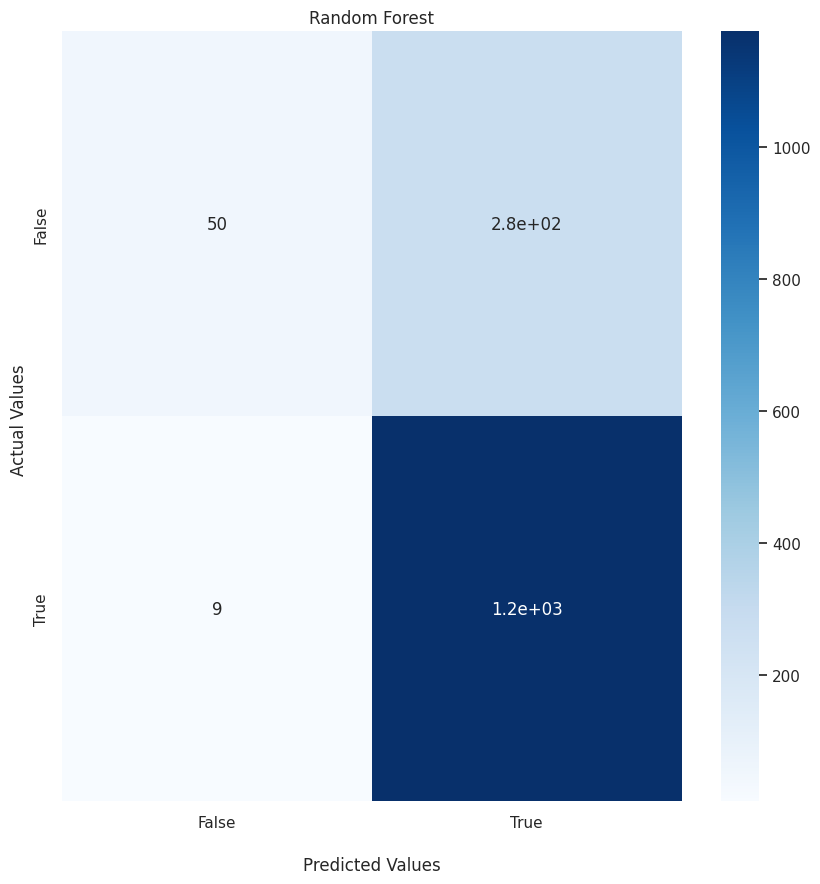

              precision    recall  f1-score   support

          -1       0.85      0.15      0.26       325
           1       0.81      0.99      0.89      1184

    accuracy                           0.81      1509
   macro avg       0.83      0.57      0.58      1509
weighted avg       0.82      0.81      0.76      1509



In [64]:
confusion_matrix_Bert_Random_Forest = confusion_matrix(bert_Y_test, y_pred)

my_matrix = sns.heatmap(confusion_matrix_Bert_Random_Forest, annot=True, cmap='Blues')
my_matrix.set_title('Random Forest');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(bert_Y_test, y_pred))

## MultinomialNB with Vader Output

Test accuracy: 80.45%


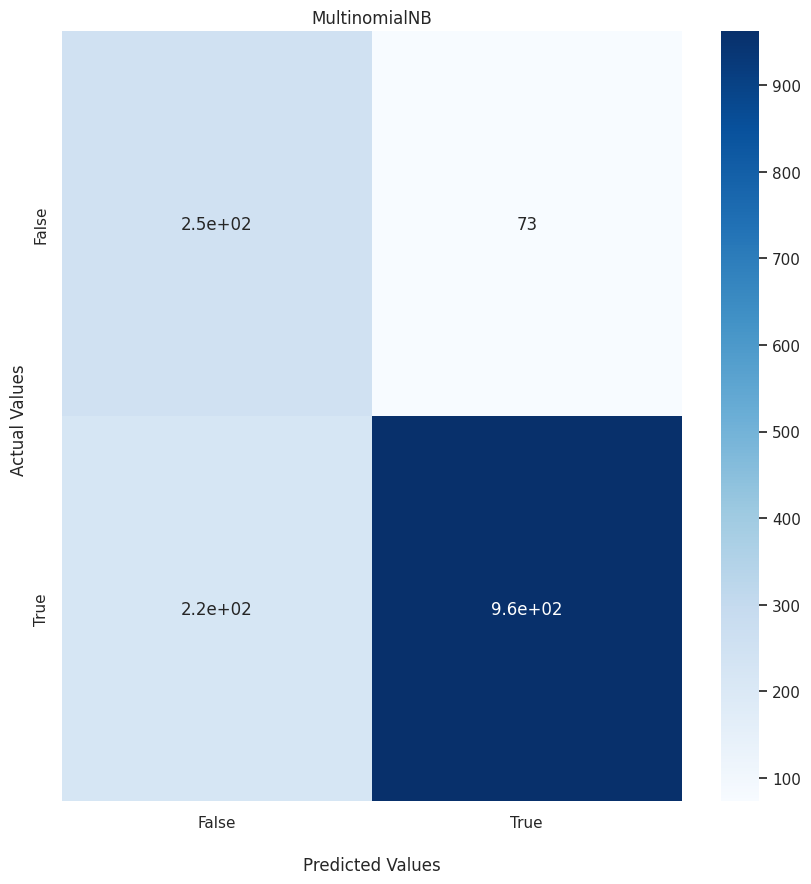

[[252  73]
 [222 962]]


              precision    recall  f1-score   support

          -1       0.53      0.78      0.63       325
           1       0.93      0.81      0.87      1184

    accuracy                           0.80      1509
   macro avg       0.73      0.79      0.75      1509
weighted avg       0.84      0.80      0.82      1509

0.7939423076923076


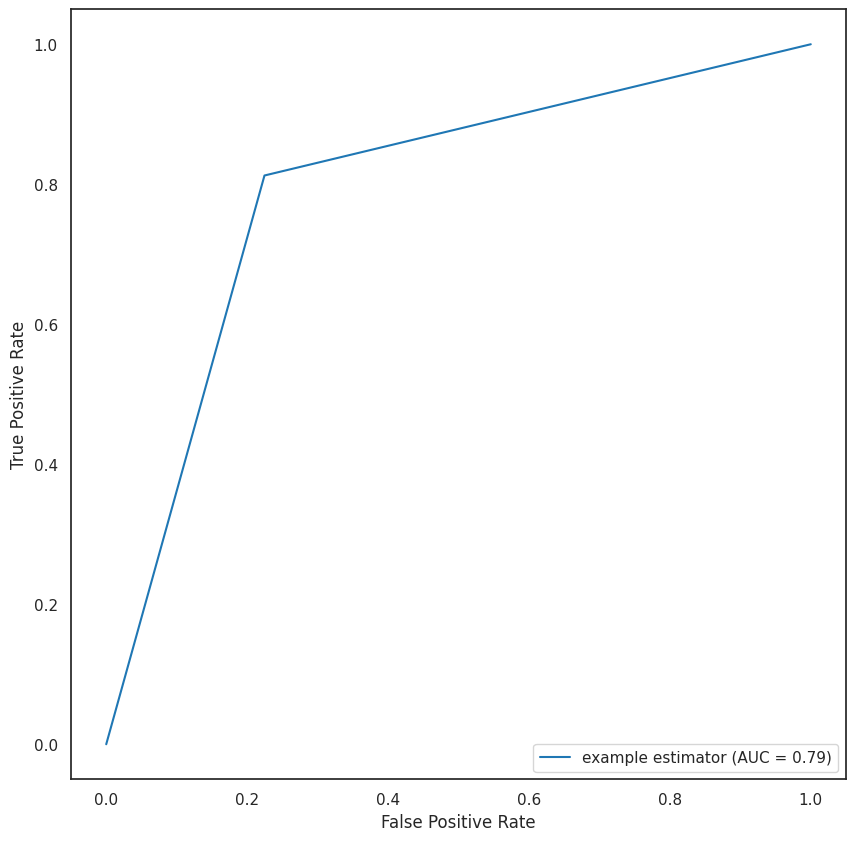

In [65]:
mnb = MultinomialNB()
mnb = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
mnb.fit(X_train, Y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, Y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

confusion_matrix_mnb = confusion_matrix(Y_test, mnb_pred)

my_matrix = sns.heatmap(confusion_matrix_mnb, annot=True, cmap='Blues')
my_matrix.set_title('MultinomialNB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Displaying the
print(confusion_matrix(Y_test, mnb_pred))
print("\n")
print(classification_report(Y_test, mnb_pred))
print(roc_auc_score(Y_test, mnb_pred))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, mnb_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## Multinomial NB for Bert CLS output

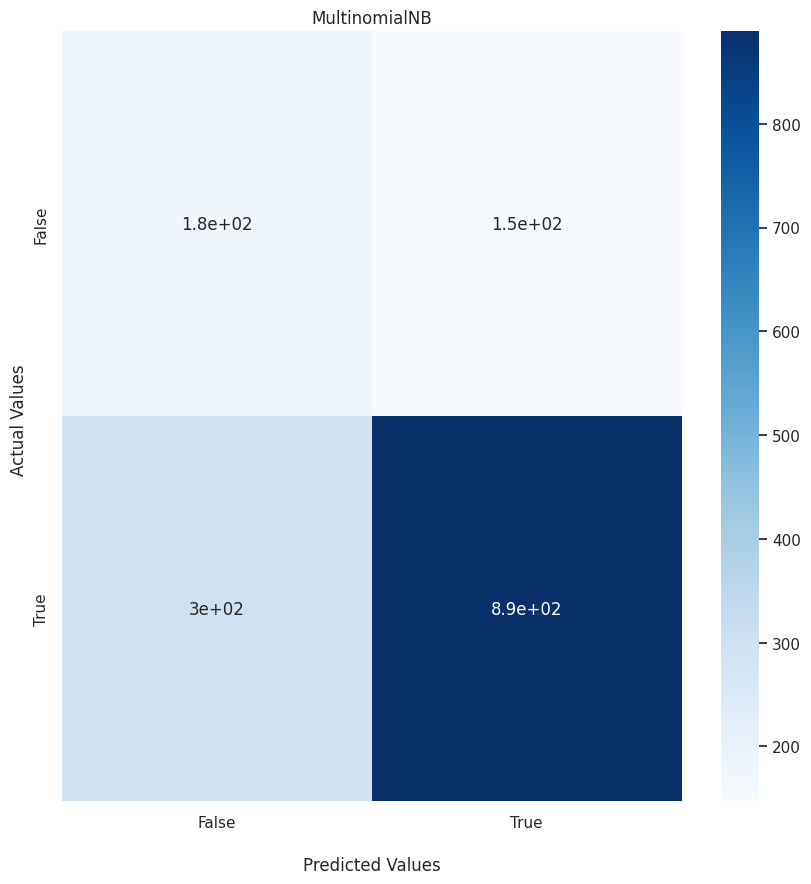

In [134]:
scaler = MinMaxScaler()

X_train_bert_NB = scaler.fit_transform(X_train_bert) 
bert_X_test_NB = scaler.transform(bert_X_test)

mnnb = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
mnnb.fit(X_train_bert_NB, Y_train_bert)

mnnb_pred = mnnb.predict(bert_X_test_NB)
mcnb_acc = accuracy_score(mnnb_pred, bert_Y_test)

confusion_matrix2 = confusion_matrix(bert_Y_test, mnnb_pred)

my_matrix = sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')
my_matrix.set_title('MultinomialNB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



Test accuracy: 70.71%
[[178 147]
 [295 889]]


              precision    recall  f1-score   support

          -1       0.38      0.55      0.45       325
           1       0.86      0.75      0.80      1184

    accuracy                           0.71      1509
   macro avg       0.62      0.65      0.62      1509
weighted avg       0.75      0.71      0.72      1509



0.6492684511434512


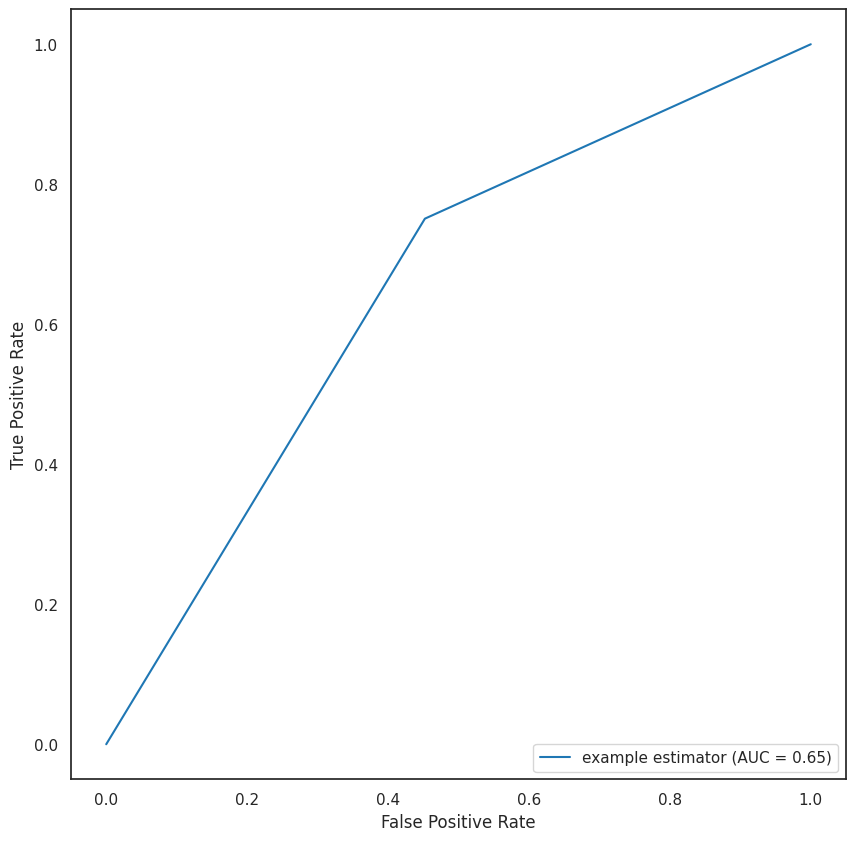

In [133]:
print("Test accuracy: {:.2f}%".format(mcnb_acc*100))

# Displaying the
print(confusion_matrix(bert_Y_test, mnnb_pred))
print("\n")
print(classification_report(bert_Y_test, mnnb_pred))
print("\n")
print(roc_auc_score(bert_Y_test, mnnb_pred))

fpr, tpr, thresholds = metrics.roc_curve(bert_Y_test, mnnb_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [67]:
perf_measure(bert_Y_test, mnnb_pred)

(889, 147, 178, 295)

## Bernoulli Naive Bayes for BERT Dataset

In [68]:
from sklearn.naive_bayes import BernoulliNB

clf_Bernoulli = BernoulliNB()
clf_Bernoulli.fit(X_train_bert, Y_train_bert)
y_pred_Bernoulli=clf_Bernoulli.predict(bert_X_test)

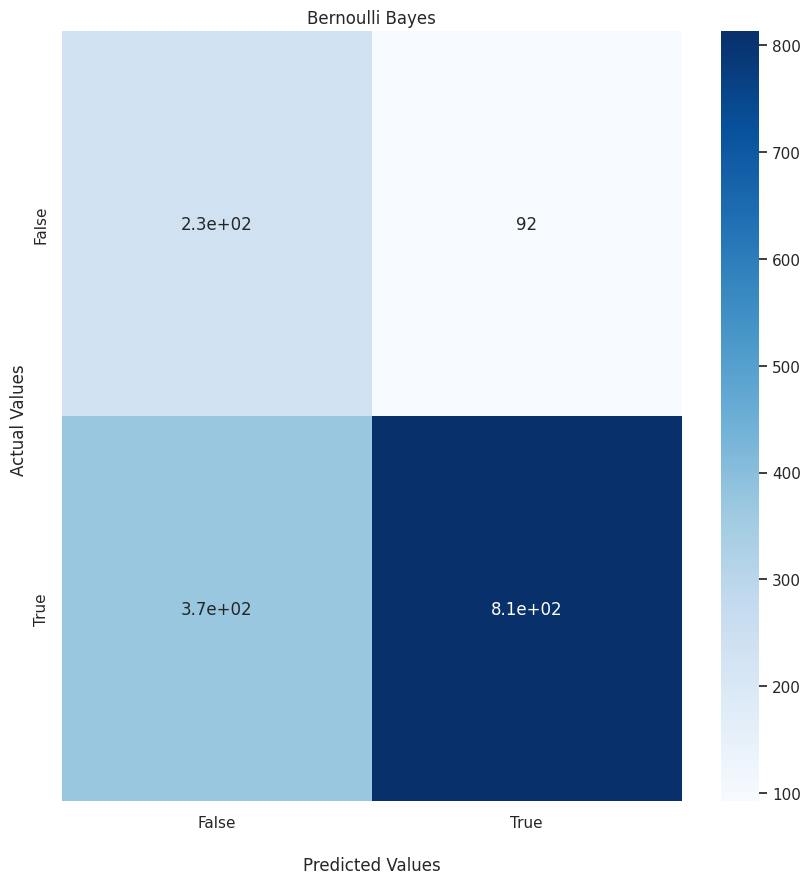

              precision    recall  f1-score   support

          -1       0.39      0.72      0.50       325
           1       0.90      0.69      0.78      1184

    accuracy                           0.69      1509
   macro avg       0.64      0.70      0.64      1509
weighted avg       0.79      0.69      0.72      1509



In [69]:
confusion_matrix1 = confusion_matrix(bert_Y_test, y_pred_Bernoulli)

my_matrix = sns.heatmap(confusion_matrix1, annot=True, cmap='Blues')
my_matrix.set_title('Bernoulli Bayes');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(bert_Y_test, y_pred_Bernoulli))

In [70]:
perf_measure(bert_Y_test, y_pred_Bernoulli)

(813, 92, 233, 371)

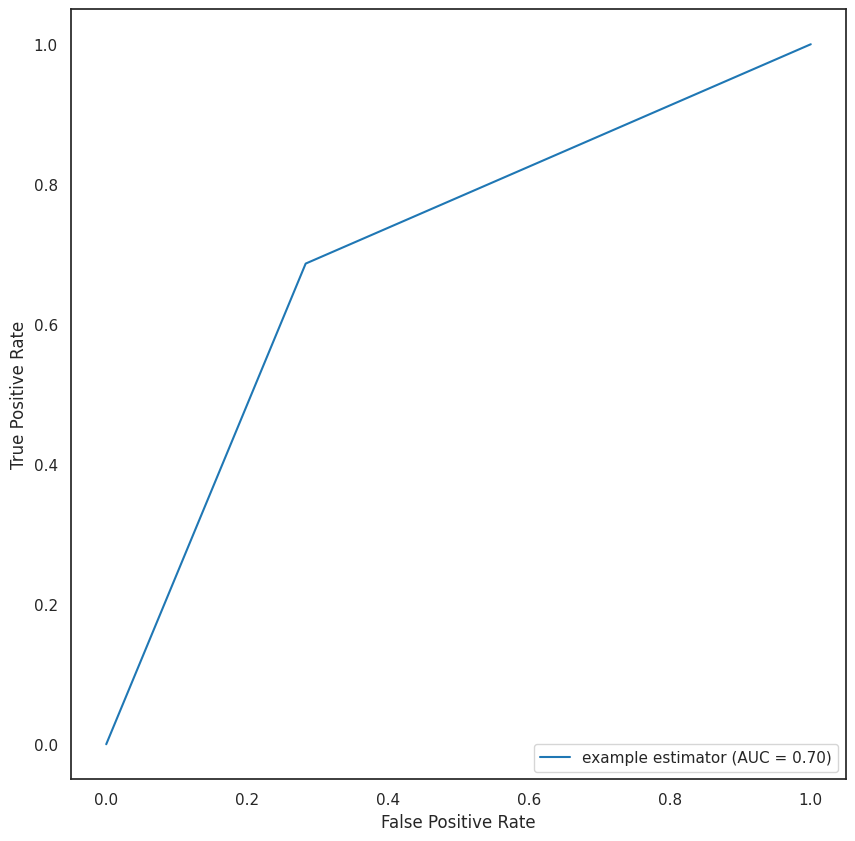

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(bert_Y_test, y_pred_Bernoulli)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(bert_Y_test, y_pred_Bernoulli)

0.7017892411642412

## Bernoulli Naive Bayes for Vader Dataset

In [73]:
clf_Bernoulli_vader = BernoulliNB()
clf_Bernoulli_vader.fit(X_train, Y_train)

Bernoulli_vader_pred = clf_Bernoulli_vader.predict(X_test)
Bernoulli_vader_acc = accuracy_score(Bernoulli_vader_pred, Y_test)
print("Test accuracy: {:.2f}%".format(Bernoulli_vader_acc*100))

# Displaying the accuracy
print(confusion_matrix(Y_test, Bernoulli_vader_pred))
print("\n")
print(classification_report(Y_test, Bernoulli_vader_pred))
print("\n")
print(roc_auc_score(Y_test, Bernoulli_vader_pred))

Test accuracy: 82.57%
[[ 117  208]
 [  55 1129]]


              precision    recall  f1-score   support

          -1       0.68      0.36      0.47       325
           1       0.84      0.95      0.90      1184

    accuracy                           0.83      1509
   macro avg       0.76      0.66      0.68      1509
weighted avg       0.81      0.83      0.80      1509



0.6567736486486486


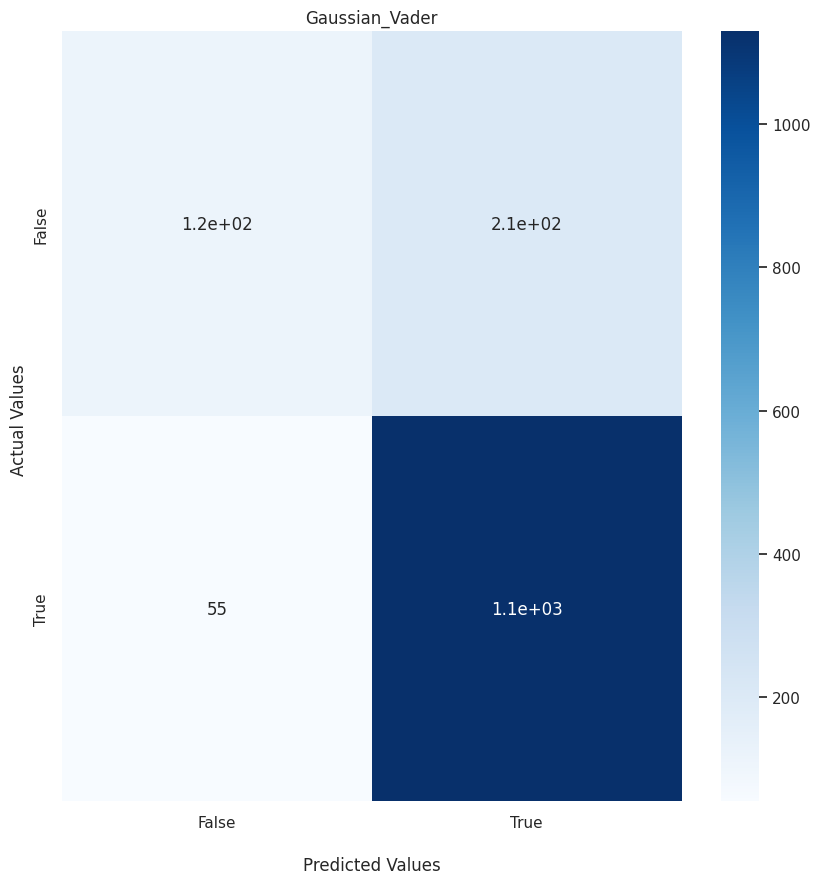

In [74]:
confusion_matrix_bernoulli_vader = confusion_matrix(Y_test, Bernoulli_vader_pred)

my_matrix = sns.heatmap(confusion_matrix_bernoulli_vader, annot=True, cmap='Blues')
my_matrix.set_title('Gaussian_Vader');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



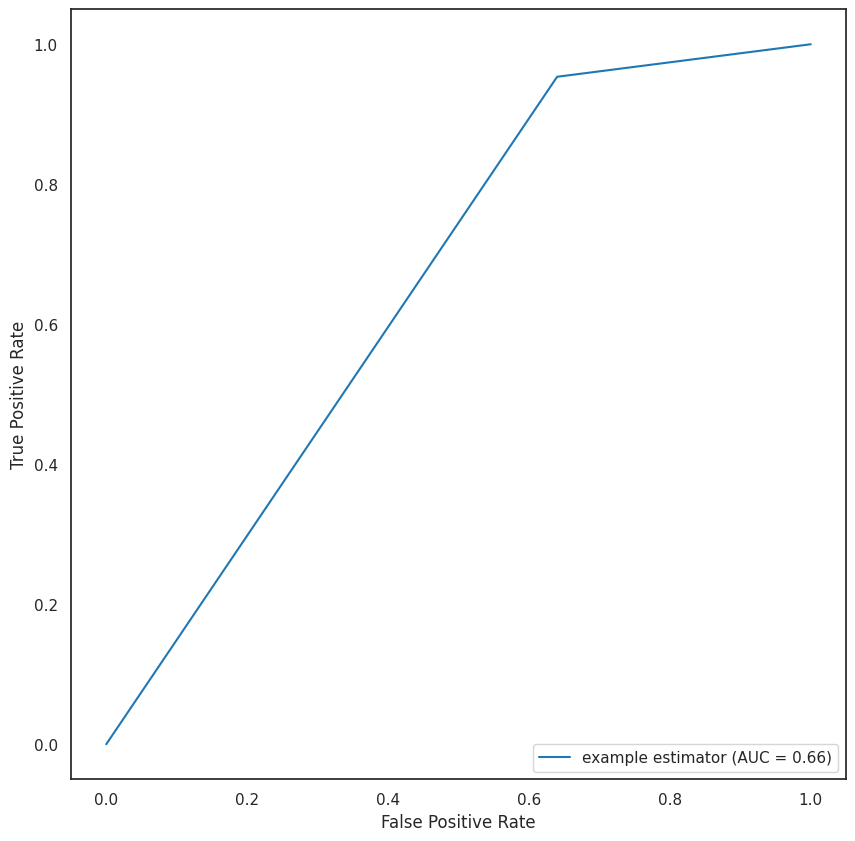

In [75]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Bernoulli_vader_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

# Complement Naive Bayes for Bert dataset - suited for work on imbalanced datasets 

In [77]:
scaler = MinMaxScaler()

X_train_bert_NB = scaler.fit_transform(X_train_bert) 
bert_X_test_NB = scaler.transform(bert_X_test)


mcnb = ComplementNB(alpha=0.0, class_prior=[0.4, 0.6])
mcnb.fit(X_train_bert_NB, Y_train_bert)

mcnb_pred = mcnb.predict(bert_X_test_NB)
mcnb_acc = accuracy_score(mcnb_pred, bert_Y_test)
print("Test accuracy: {:.2f}%".format(mcnb_acc*100))

# Displaying the
print(confusion_matrix(bert_Y_test, mcnb_pred))
print("\n")
print(classification_report(bert_Y_test, mcnb_pred))
print("\n")
print(roc_auc_score(bert_Y_test, mcnb_pred))

Test accuracy: 68.46%
[[208 117]
 [359 825]]


              precision    recall  f1-score   support

          -1       0.37      0.64      0.47       325
           1       0.88      0.70      0.78      1184

    accuracy                           0.68      1509
   macro avg       0.62      0.67      0.62      1509
weighted avg       0.77      0.68      0.71      1509



0.6683952702702702


In [78]:
perf_measure(bert_Y_test, mcnb_pred)

(825, 117, 208, 359)

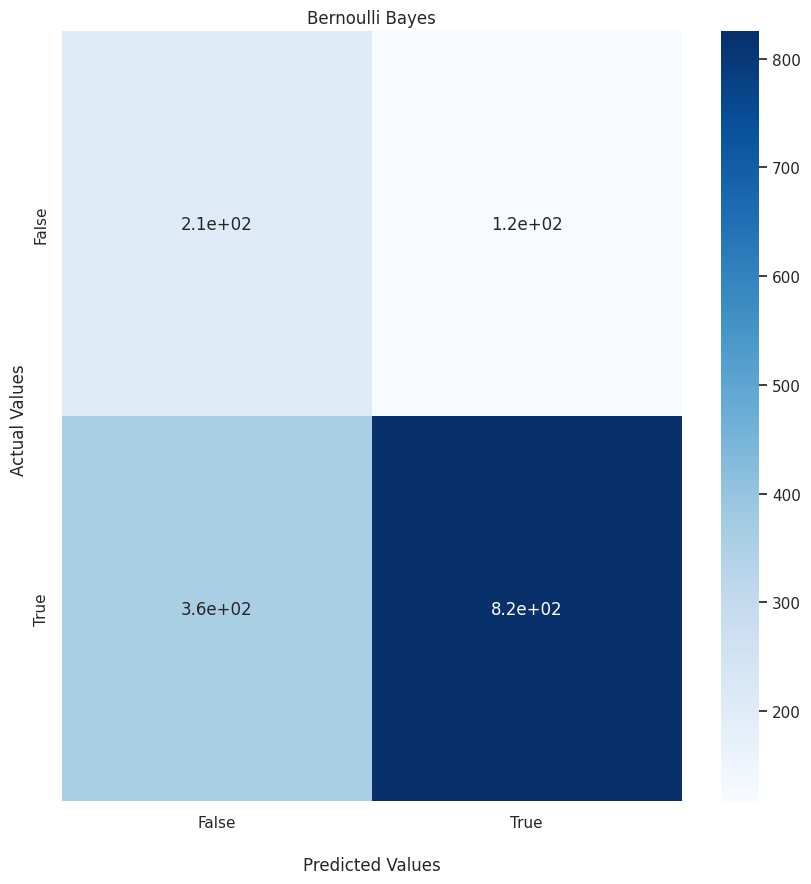

              precision    recall  f1-score   support

          -1       0.39      0.72      0.50       325
           1       0.90      0.69      0.78      1184

    accuracy                           0.69      1509
   macro avg       0.64      0.70      0.64      1509
weighted avg       0.79      0.69      0.72      1509



In [79]:
confusion_matrix1 = confusion_matrix(bert_Y_test, mcnb_pred)

my_matrix = sns.heatmap(confusion_matrix1, annot=True, cmap='Blues')
my_matrix.set_title('Bernoulli Bayes');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(bert_Y_test, y_pred_Bernoulli))

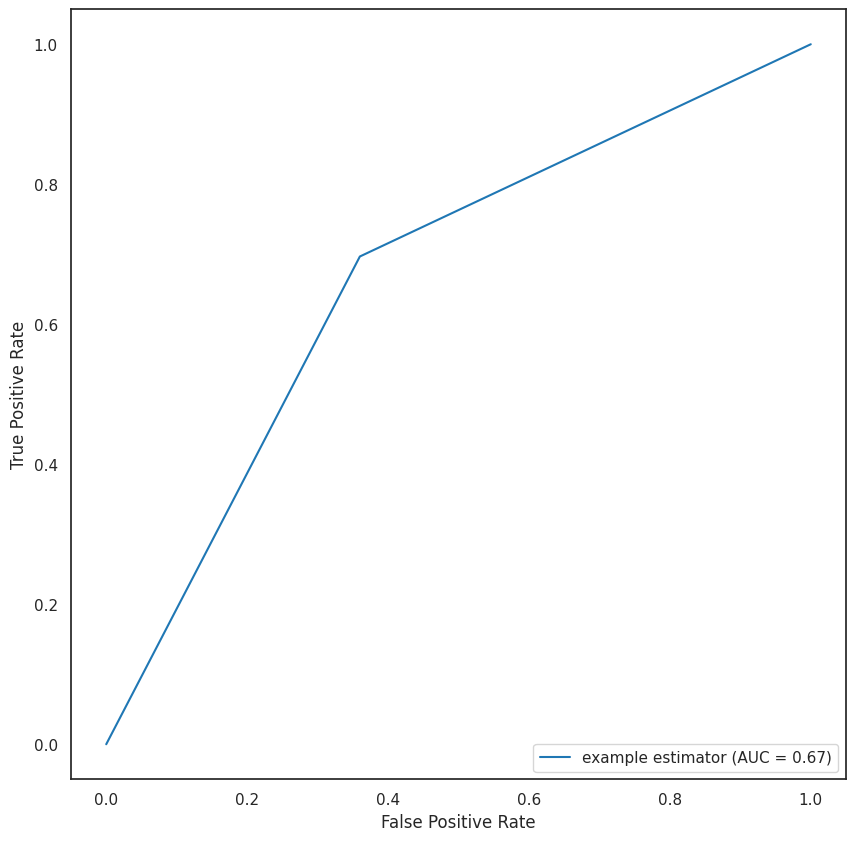

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(bert_Y_test, mcnb_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

# Complement Naive Bayes for Vader dataset  - suited for work on imbalanced datasets 

In [81]:
mcnb1 = ComplementNB(alpha=0.0, class_prior=[0.4, 0.6])
mcnb1.fit(X_train, Y_train)

mcnb1_pred = mcnb1.predict(X_test)
mcnb1_acc = accuracy_score(mcnb1_pred, Y_test)
print("Test accuracy: {:.2f}%".format(mcnb1_acc*100))

# Displaying the accuracy
print(confusion_matrix(Y_test, mcnb1_pred))
print("\n")
print(classification_report(Y_test, mcnb1_pred))
print("\n")
print(roc_auc_score(Y_test, mcnb1_pred))

Test accuracy: 80.45%
[[252  73]
 [222 962]]


              precision    recall  f1-score   support

          -1       0.53      0.78      0.63       325
           1       0.93      0.81      0.87      1184

    accuracy                           0.80      1509
   macro avg       0.73      0.79      0.75      1509
weighted avg       0.84      0.80      0.82      1509



0.7939423076923076


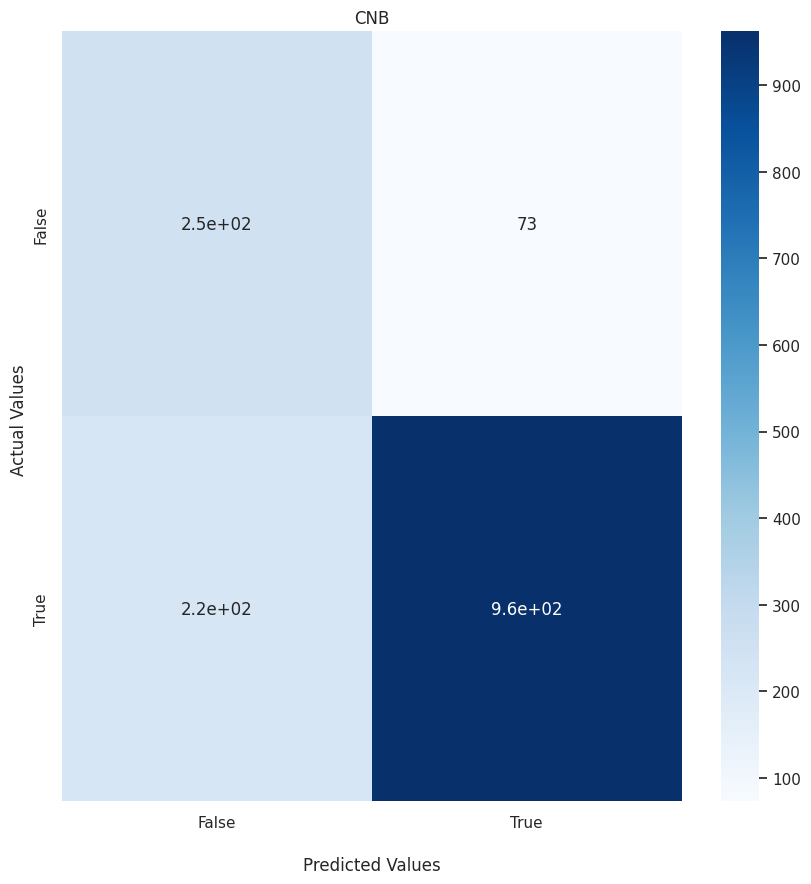

In [82]:
confusion_matrix_cnb_vader = confusion_matrix(Y_test, mcnb1_pred)

my_matrix = sns.heatmap(confusion_matrix_cnb_vader, annot=True, cmap='Blues')
my_matrix.set_title('CNB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



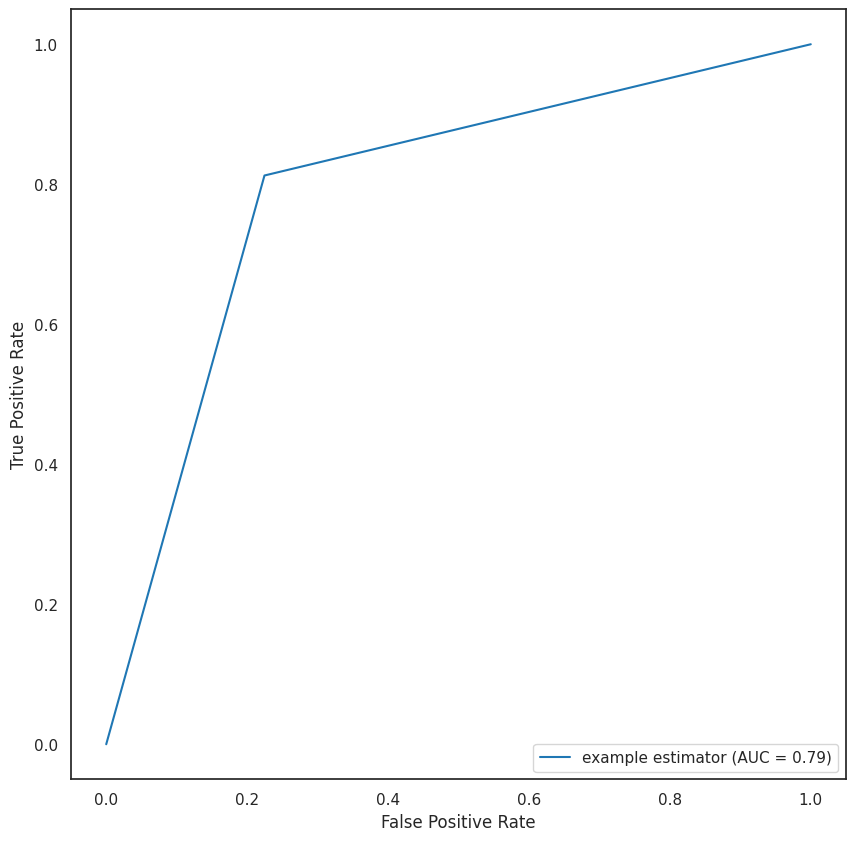

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, mcnb1_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## Gaussian Naive Bayes for Bert 

In [84]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_bert, Y_train_bert)
GaussianNB()


GaussianNB()

In [85]:
gaus_pred=clf.predict(bert_X_test)

In [86]:
gaus_acc = accuracy_score(gaus_pred, bert_Y_test)
print("Test accuracy: {:.2f}%".format(gaus_acc*100))

# Displaying the
print(confusion_matrix(bert_Y_test, gaus_pred))
print("\n")
print(classification_report(bert_Y_test, gaus_pred))
print("\n")
print(roc_auc_score(bert_Y_test, gaus_pred))

Test accuracy: 69.91%
[[213 112]
 [342 842]]


              precision    recall  f1-score   support

          -1       0.38      0.66      0.48       325
           1       0.88      0.71      0.79      1184

    accuracy                           0.70      1509
   macro avg       0.63      0.68      0.64      1509
weighted avg       0.78      0.70      0.72      1509



0.6832666320166321


In [87]:
perf_measure(bert_Y_test, gaus_pred)

(842, 112, 213, 342)

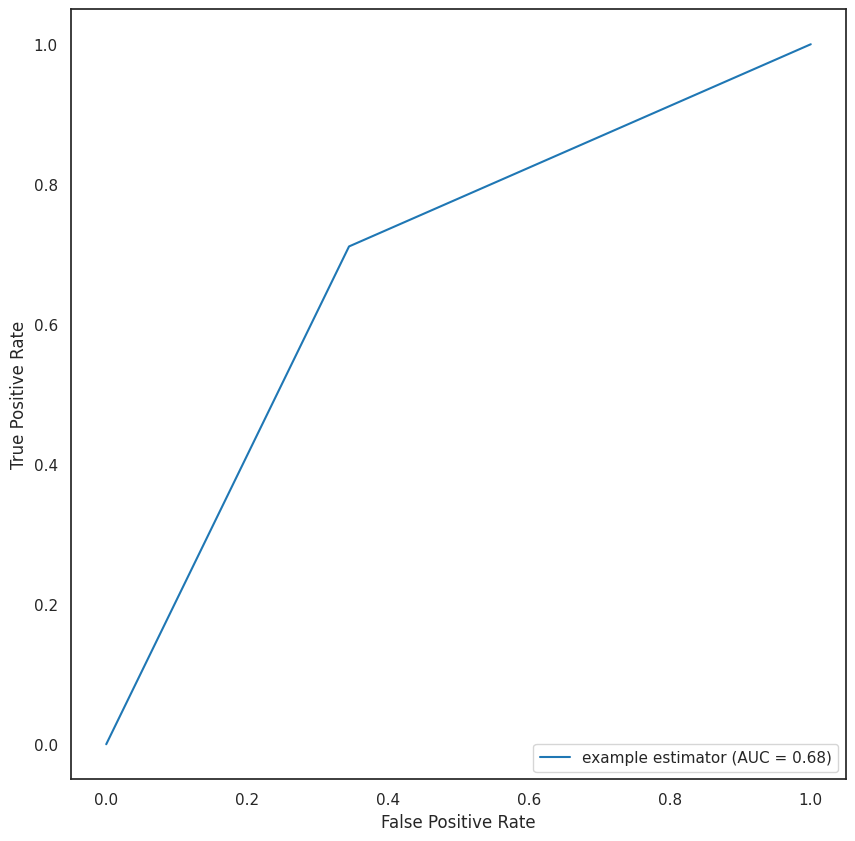

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(bert_Y_test, gaus_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [89]:
roc_auc_score(bert_Y_test, gaus_pred)

0.6832666320166321

## Gaussian NB for Vader dataset

In [90]:
clf_gaus = GaussianNB()

clf_gaus.fit(X_train, Y_train)
GaussianNB()

GaussianNB()

In [91]:
gaus_vader_pred = clf_gaus.predict(X_test)
gaus_pred_vader_acc = accuracy_score(gaus_vader_pred, Y_test)
print("Test accuracy: {:.2f}%".format(gaus_pred_vader_acc*100))

# Displaying the accuracy
print(confusion_matrix(Y_test, gaus_vader_pred))
print("\n")
print(classification_report(Y_test, gaus_vader_pred))
print("\n")
print(roc_auc_score(Y_test, gaus_vader_pred))

Test accuracy: 82.04%
[[ 225  100]
 [ 171 1013]]


              precision    recall  f1-score   support

          -1       0.57      0.69      0.62       325
           1       0.91      0.86      0.88      1184

    accuracy                           0.82      1509
   macro avg       0.74      0.77      0.75      1509
weighted avg       0.84      0.82      0.83      1509



0.7739410083160083


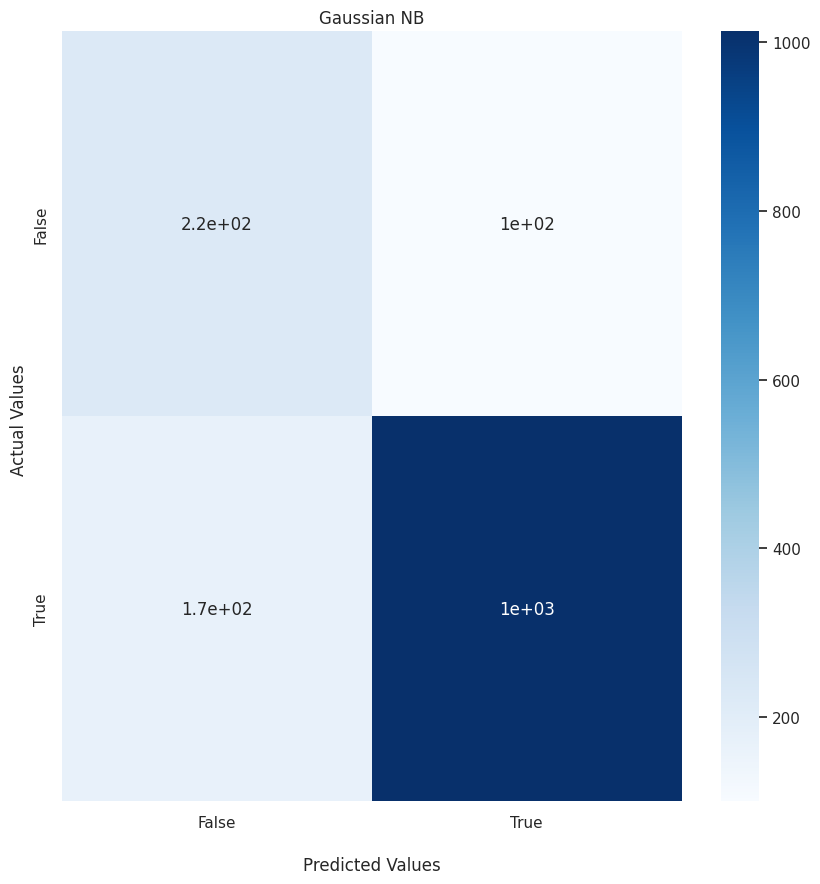

In [92]:
confusion_matrix_gaus_vader = confusion_matrix(Y_test, gaus_vader_pred)

my_matrix = sns.heatmap(confusion_matrix_gaus_vader, annot=True, cmap='Blues')
my_matrix.set_title('Gaussian NB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



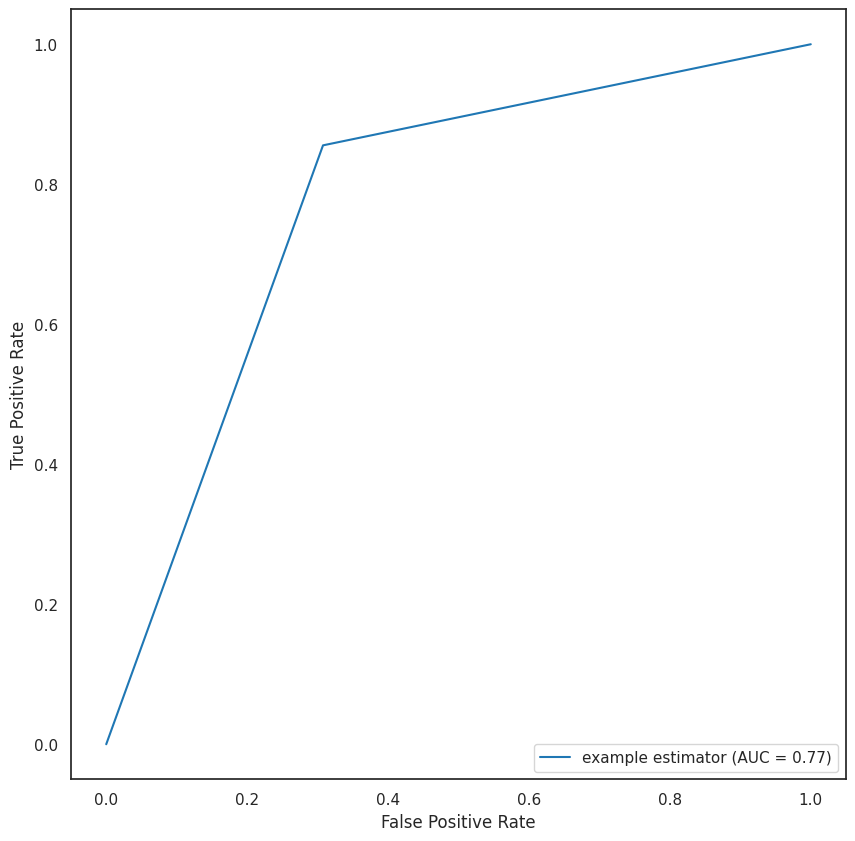

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, gaus_vader_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## Categorical Naive Bayes for Bert

In [120]:
from sklearn.naive_bayes import CategoricalNB

scaler = MinMaxScaler()

X_train_bert_cat = scaler.fit_transform(X_train_bert) 
bert_X_test_cat = scaler.transform(bert_X_test)



clf_cat = CategoricalNB(min_categories=2)
clf_cat.fit(X_train_bert_cat, Y_train_bert)
clf_cat

CategoricalNB(min_categories=2)

In [121]:
catNB_pred = clf_cat.predict(bert_X_test_NB)

In [122]:
catNB_acc = accuracy_score(catNB_pred, bert_Y_test)
print("Test accuracy: {:.2f}%".format(catNB_acc*100))

# Displaying the
print(confusion_matrix(bert_Y_test, catNB_pred))
print("\n")
print(classification_report(bert_Y_test, catNB_pred))
print("\n")
print(roc_auc_score(bert_Y_test, catNB_pred))

Test accuracy: 77.93%
[[  18  307]
 [  26 1158]]


              precision    recall  f1-score   support

          -1       0.41      0.06      0.10       325
           1       0.79      0.98      0.87      1184

    accuracy                           0.78      1509
   macro avg       0.60      0.52      0.49      1509
weighted avg       0.71      0.78      0.71      1509



0.516712577962578


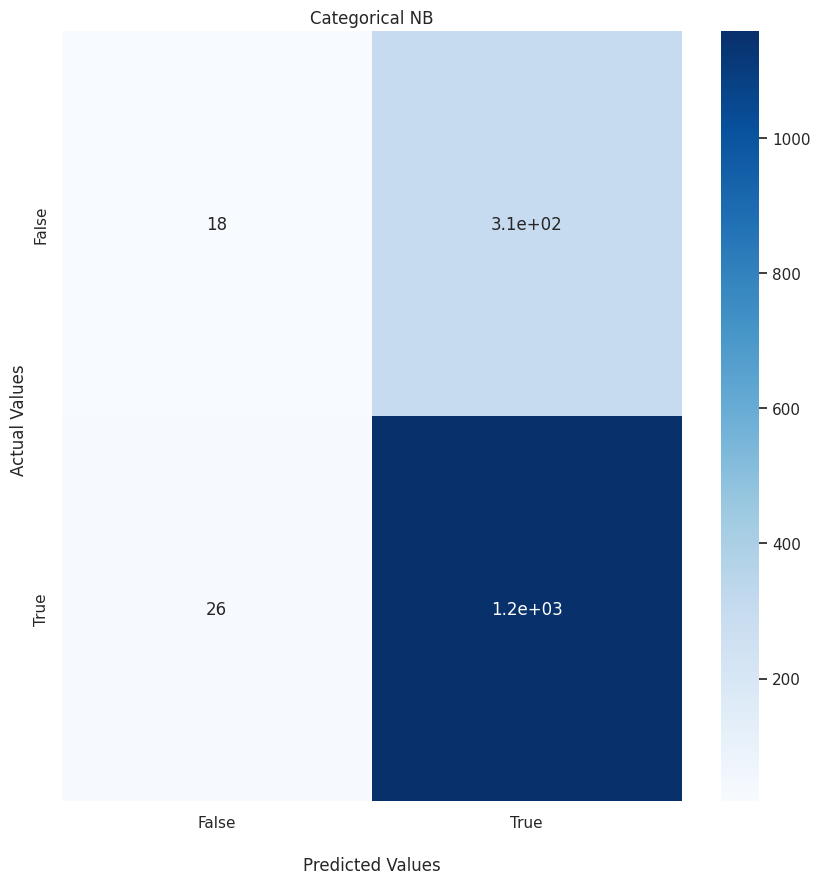

In [123]:
confusion_matrix_catNB_Bert = confusion_matrix(Y_test, catNB_pred)

my_matrix = sns.heatmap(confusion_matrix_catNB_Bert, annot=True, cmap='Blues')
my_matrix.set_title('Categorical NB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



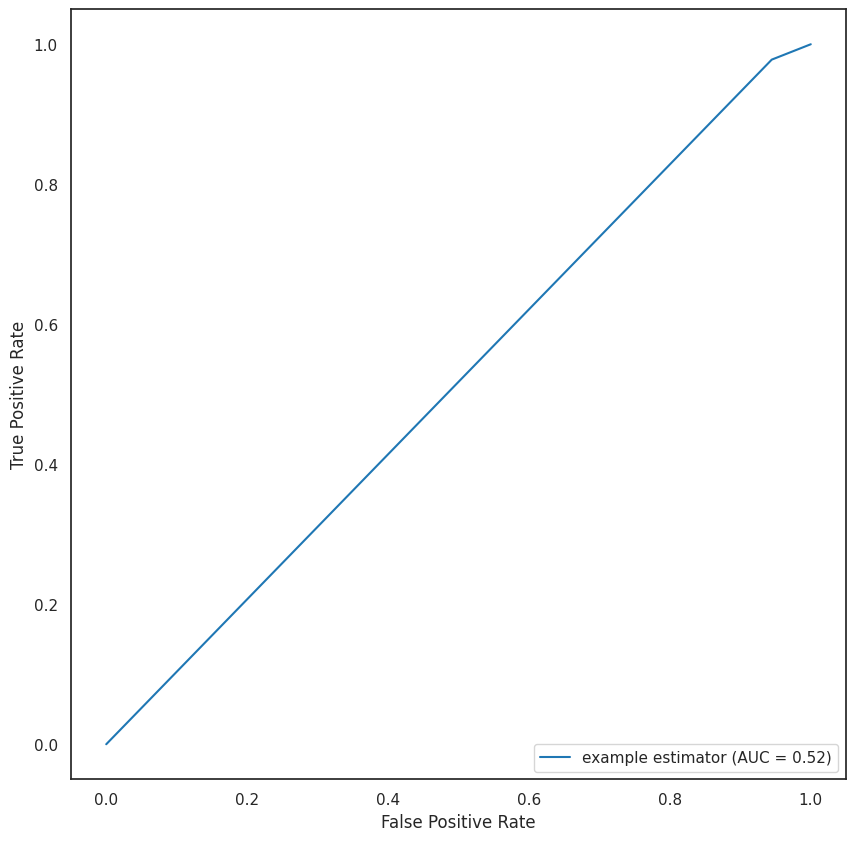

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(bert_Y_test, catNB_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## Categorical Naive Bayes for Vader

In [125]:
clf_cat_vader = CategoricalNB(min_categories=2)
clf_cat_vader.fit(X_train, Y_train)
clf_cat_vader

CategoricalNB(min_categories=2)

In [128]:
catNB_vader_pred = clf_cat_vader.predict(X_test)
catNB_pred_vader_acc = accuracy_score(catNB_vader_pred, Y_test)
print("Test accuracy: {:.2f}%".format(catNB_pred_vader_acc*100))

# Displaying the accuracy
print(confusion_matrix(Y_test, catNB_vader_pred))
print("\n")
print(classification_report(Y_test, catNB_vader_pred))
print("\n")
print(roc_auc_score(Y_test, catNB_vader_pred))

Test accuracy: 82.84%
[[ 173  152]
 [ 107 1077]]


              precision    recall  f1-score   support

          -1       0.62      0.53      0.57       325
           1       0.88      0.91      0.89      1184

    accuracy                           0.83      1509
   macro avg       0.75      0.72      0.73      1509
weighted avg       0.82      0.83      0.82      1509



0.7209680353430354


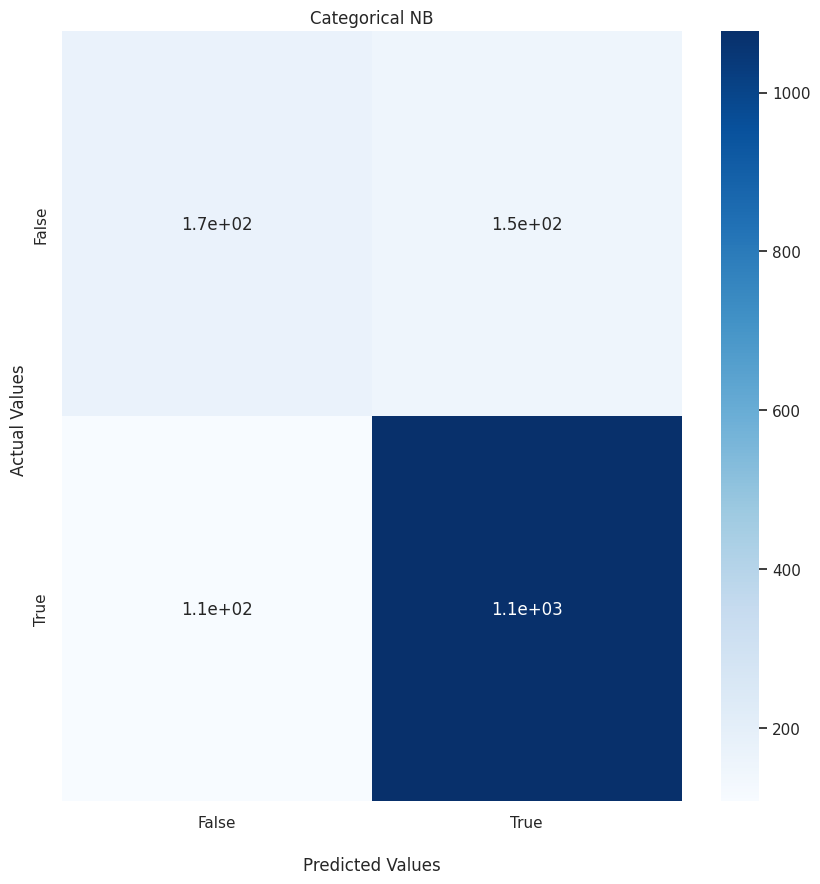

In [129]:
confusion_matrix_catNB_vader = confusion_matrix(Y_test, catNB_vader_pred)

my_matrix = sns.heatmap(confusion_matrix_catNB_vader, annot=True, cmap='Blues')
my_matrix.set_title('Categorical NB');
my_matrix.set_xlabel('\nPredicted Values')
my_matrix.set_ylabel('Actual Values ');
my_matrix.xaxis.set_ticklabels(['False','True'])
my_matrix.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



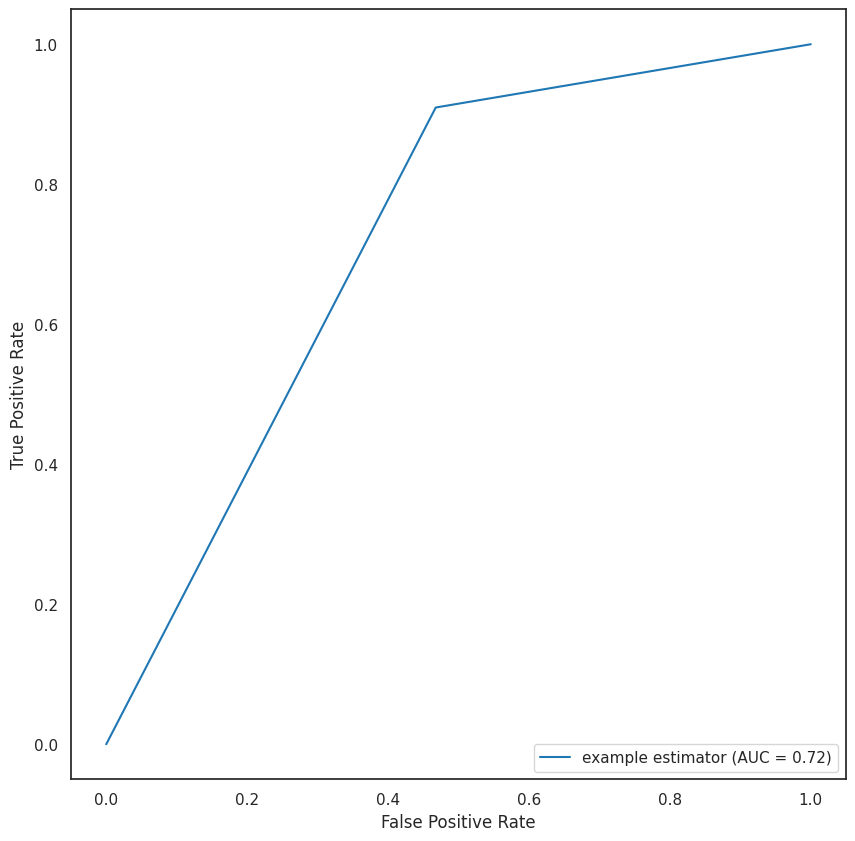

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, catNB_vader_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()